<a href="https://colab.research.google.com/github/pa-shk/data_analysis_fundamentals/blob/master/house_price_project/%D0%BE%D0%90%D0%94_%D0%BF%D1%80%D0%BE%D0%B5%D0%BA%D1%82.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Импортирование необходимых библиотек и модулей

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter
from sklearn import linear_model, metrics, set_config
from scipy.stats import spearmanr
from sklearn.impute import KNNImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor

# О датасете

*   Кем собран? 
> Шкунов Павел Андреевич
*   Про что? 
> Квартиры на вторичном рынке в Нижнем Новгороде
*   Источник данных?
> сайт недвижимости [Циан](https://nn.cian.ru/)
*   Инструменты сбора данных?
> веб-скрейпинг с помощью библиотеки Selenium [код](https://github.com/pa-shk/data_analysis_fundamentals/tree/master/house_price_project)
*   Типы данных в датасете?
> все колонки имеют текствый тип (type Object)

# Предобработка датасета

Загрузка датасета из гитхаб репозитория

In [ ]:
! git clone https://github.com/pa-shk/data_analysis_fundamentals

Cloning into 'data_analysis_fundamentals'...
remote: Enumerating objects: 34, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 34 (delta 9), reused 27 (delta 6), pack-reused 0
Unpacking objects: 100% (34/34), done.


In [ ]:
df = pd.read_csv('/content/data_analysis_fundamentals/house_price_project/output.tsv', 
                 sep='\t', 
                 names=['link', 'price_info', 'title', 'location', 'general_info', 'additional_info', 'house_info'])
df

,link,price_info,title,location,general_info,additional_info,house_info
0,https://nn.cian.ru/sale/flat/273624550/,Онлайн-показ\r\n2 990 000 ₽\r\n97 394 ₽/м²\r\n...,"1-комн. квартира, 30,7 м²","Нижегородская область, Нижний Новгород, р-н Пр...","30,7 м²\r\nОбщая\r\n20,3 м²\r\nЖилая\r\n4,4 м²...",Тип жилья\r\nВторичка\r\nПлощадь комнат\r\n20....,О доме\r\nПо данным Циан\r\nГод постройки\r\n1...
1,https://nn.cian.ru/sale/flat/278923380/,Хорошая цена\r\n3 360 000 ₽\r\n96 000 ₽/м²\r\n...,"1-комн. квартира, 35 м²","Нижегородская область, Нижний Новгород, р-н Ав...",35 м²\r\nОбщая\r\n18 м²\r\nЖилая\r\n9 м²\r\nКу...,Тип жилья\r\nВторичка\r\nСанузел\r\n1 совмещен...,О доме\r\nПо данным Циан\r\nГод постройки\r\n1...
2,https://nn.cian.ru/sale/flat/276237014/,Хорошая цена\r\n6 300 000 ₽\r\n156 716 ₽/м²\r\...,"Студия, 40,2 м²","Нижегородская область, Нижний Новгород, р-н Со...","40,2 м²\r\nОбщая\r\n16,8 м²\r\nЖилая\r\n10,5 м...","Тип жилья\r\nВторичка\r\nВысота потолков\r\n2,...",О доме\r\nПо данным Циан\r\nГод постройки\r\n2...
3,https://nn.cian.ru/sale/flat/279289896/,Хорошая цена\r\n3 400 000 ₽\r\n103 030 ₽/м²\r\...,"1-комн. квартира, 33 м²","Нижегородская область, Нижний Новгород, р-н Ав...",33 м²\r\nОбщая\r\n18 м²\r\nЖилая\r\n6 м²\r\nКу...,Тип жилья\r\nВторичка\r\nПлощадь комнат\r\n18 ...,О доме\r\nПо данным Циан\r\nГод постройки\r\n1...
4,https://nn.cian.ru/sale/flat/280632453/,Хорошая цена\r\nТолько на Циан\r\n2 150 000 ₽\...,"1-комн. квартира, 32,1 м²","Нижегородская область, Бор, ул. Лесная, 3На карте","32,1 м²\r\nОбщая\r\n17 м²\r\nЖилая\r\n6 м²\r\n...",Тип жилья\r\nВторичка\r\nСанузел\r\n1 совмещен...,О доме\r\nПо данным Циан\r\nГод постройки\r\n1...
...,...,...,...,...,...,...,...
1040,https://nn.cian.ru/sale/flat/279966114/,Хорошая цена\r\nТолько на Циан\r\n3 550 000 ₽\...,"1-комн. квартира, 31,6 м²","Нижегородская область, Нижний Новгород, р-н Со...","31,6 м²\r\nОбщая\r\n17 м²\r\nЖилая\r\n6,6 м²\r...","Тип жилья\r\nВторичка\r\nВысота потолков\r\n2,...",О доме\r\nПо данным Циан\r\nГод постройки\r\n1...
1041,https://nn.cian.ru/sale/flat/273327824/,6 300 000 ₽\r\n138 158 ₽/м²\r\nот 49 609 ₽/мес...,"2-комн. квартира, 45,6 м²","Нижегородская область, Нижний Новгород, р-н Ни...","45,6 м²\r\nОбщая\r\n30 м²\r\nЖилая\r\n7 м²\r\n...","Тип жилья\r\nВторичка\r\nВысота потолков\r\n2,...",О доме\r\nПо данным Циан\r\nГод постройки\r\n1...
1042,https://nn.cian.ru/sale/flat/280421825/,Только на Циан\r\n30 000 000 ₽\r\n331 126 ₽/м²...,"3-комн. квартира, 90,6 м²","Нижегородская область, Нижний Новгород, р-н Ни...","90,6 м²\r\nОбщая\r\n60 м²\r\nЖилая\r\n14 м²\r\...",Тип жилья\r\nВторичка\r\nПланировка\r\nИзолиро...,О доме\r\nПо данным Циан\r\nГод постройки\r\n2...
1043,https://nn.cian.ru/sale/flat/278962057/,10 400 000 ₽\r\n133 333 ₽/м²\r\nот 81 895 ₽/ме...,"2-комн. квартира, 78 м²","Нижегородская область, Нижний Новгород, р-н Ни...","78 м²\r\nОбщая\r\n17,4 м²\r\nКухня\r\n7 из 17\...",Тип жилья\r\nВторичка\r\nПланировка\r\nИзолиро...,О доме\r\nПо данным Циан\r\nГод постройки\r\n2...


Так как датасет содержит только текстовую информацию, нужно извлечь из него числовые и категориальные признаки.
В данном проекте используется следующий алгоритм извлечения признаков:
1.  Определение признаков, которые можно извлечь из каждой колонки (для колонок, где возможно извлечь несколко признаков). Используются только признаки, которые можно извлечь из более 80% объектов
2.  Создание новой колонки с извлеченными с помощью регулярных выражений данными
2.  Приведение данных к нужному типу (для числовых признаков)
3.  Проверка корректности извлечения данных с помощью посчета количества nan значений

Создание функции для обработки текста колонок (извлекает фразы из объявления)

In [ ]:
def extract_phrases(column):
  words = []
  for row in column:
    words.extend(re.findall(r'[А-Яа-я ]+', row))
  return words

Удалим колонку `link` и проверим есть ли объявления, которые размещены по разным ссылкам, но содержат одинаковую информацию

In [ ]:
df.drop(columns=['link'], inplace=True)

In [ ]:
df.duplicated().sum()

0

Среди объявлений нет дубликатов

#### Извлечение данных из price

In [ ]:
df.price_info[1]

'Хорошая цена\r\n3 360 000 ₽\r\n96 000 ₽/м²\r\nот 26 656 ₽/мес в ипотеку\r\nСледить за изменением цены\r\nСвободная продажа, возможна ипотека\r\nПоказать телефон\r\nАГЕНТСТВО НЕДВИЖИМОСТИ\r\nКремлевские Ворота\r\nДокументы проверены\r\nРИЕЛТОР\r\nСергей Викторович Прокин\r\nОдин запрос в 11 банков\r\n10 минут на предварительное решение по ипотеке\r\nСтавки от 10,4%'

In [ ]:
df['price'] = df['price_info'].str.extract(r"(\d*\s*\d{3}\s\d{3})(?=\s₽\r\n)")
df['price'] = df['price'].apply(lambda x: ''.join(re.findall('\d+', str(x))))
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df

,price_info,title,location,general_info,additional_info,house_info,price
0,Онлайн-показ\r\n2 990 000 ₽\r\n97 394 ₽/м²\r\n...,"1-комн. квартира, 30,7 м²","Нижегородская область, Нижний Новгород, р-н Пр...","30,7 м²\r\nОбщая\r\n20,3 м²\r\nЖилая\r\n4,4 м²...",Тип жилья\r\nВторичка\r\nПлощадь комнат\r\n20....,О доме\r\nПо данным Циан\r\nГод постройки\r\n1...,2990000
1,Хорошая цена\r\n3 360 000 ₽\r\n96 000 ₽/м²\r\n...,"1-комн. квартира, 35 м²","Нижегородская область, Нижний Новгород, р-н Ав...",35 м²\r\nОбщая\r\n18 м²\r\nЖилая\r\n9 м²\r\nКу...,Тип жилья\r\nВторичка\r\nСанузел\r\n1 совмещен...,О доме\r\nПо данным Циан\r\nГод постройки\r\n1...,3360000
2,Хорошая цена\r\n6 300 000 ₽\r\n156 716 ₽/м²\r\...,"Студия, 40,2 м²","Нижегородская область, Нижний Новгород, р-н Со...","40,2 м²\r\nОбщая\r\n16,8 м²\r\nЖилая\r\n10,5 м...","Тип жилья\r\nВторичка\r\nВысота потолков\r\n2,...",О доме\r\nПо данным Циан\r\nГод постройки\r\n2...,6300000
3,Хорошая цена\r\n3 400 000 ₽\r\n103 030 ₽/м²\r\...,"1-комн. квартира, 33 м²","Нижегородская область, Нижний Новгород, р-н Ав...",33 м²\r\nОбщая\r\n18 м²\r\nЖилая\r\n6 м²\r\nКу...,Тип жилья\r\nВторичка\r\nПлощадь комнат\r\n18 ...,О доме\r\nПо данным Циан\r\nГод постройки\r\n1...,3400000
4,Хорошая цена\r\nТолько на Циан\r\n2 150 000 ₽\...,"1-комн. квартира, 32,1 м²","Нижегородская область, Бор, ул. Лесная, 3На карте","32,1 м²\r\nОбщая\r\n17 м²\r\nЖилая\r\n6 м²\r\n...",Тип жилья\r\nВторичка\r\nСанузел\r\n1 совмещен...,О доме\r\nПо данным Циан\r\nГод постройки\r\n1...,2150000
...,...,...,...,...,...,...,...
1040,Хорошая цена\r\nТолько на Циан\r\n3 550 000 ₽\...,"1-комн. квартира, 31,6 м²","Нижегородская область, Нижний Новгород, р-н Со...","31,6 м²\r\nОбщая\r\n17 м²\r\nЖилая\r\n6,6 м²\r...","Тип жилья\r\nВторичка\r\nВысота потолков\r\n2,...",О доме\r\nПо данным Циан\r\nГод постройки\r\n1...,3550000
1041,6 300 000 ₽\r\n138 158 ₽/м²\r\nот 49 609 ₽/мес...,"2-комн. квартира, 45,6 м²","Нижегородская область, Нижний Новгород, р-н Ни...","45,6 м²\r\nОбщая\r\n30 м²\r\nЖилая\r\n7 м²\r\n...","Тип жилья\r\nВторичка\r\nВысота потолков\r\n2,...",О доме\r\nПо данным Циан\r\nГод постройки\r\n1...,6300000
1042,Только на Циан\r\n30 000 000 ₽\r\n331 126 ₽/м²...,"3-комн. квартира, 90,6 м²","Нижегородская область, Нижний Новгород, р-н Ни...","90,6 м²\r\nОбщая\r\n60 м²\r\nЖилая\r\n14 м²\r\...",Тип жилья\r\nВторичка\r\nПланировка\r\nИзолиро...,О доме\r\nПо данным Циан\r\nГод постройки\r\n2...,30000000
1043,10 400 000 ₽\r\n133 333 ₽/м²\r\nот 81 895 ₽/ме...,"2-комн. квартира, 78 м²","Нижегородская область, Нижний Новгород, р-н Ни...","78 м²\r\nОбщая\r\n17,4 м²\r\nКухня\r\n7 из 17\...",Тип жилья\r\nВторичка\r\nПланировка\r\nИзолиро...,О доме\r\nПо данным Циан\r\nГод постройки\r\n2...,10400000


In [ ]:
df.price.isna().sum()

0

Информация о цене была успешно извлечена

#### Извлечение данных из title

Разделим информацию, содержащуюся в колонке `title` на информацию о типе квартиры `type` и о площади квартиры `total area`

In [ ]:
df[['type','total_area']] = df['title'].str.split(",\s", expand=True)
df

,price_info,title,location,general_info,additional_info,house_info,price,type,total_area
0,Онлайн-показ\r\n2 990 000 ₽\r\n97 394 ₽/м²\r\n...,"1-комн. квартира, 30,7 м²","Нижегородская область, Нижний Новгород, р-н Пр...","30,7 м²\r\nОбщая\r\n20,3 м²\r\nЖилая\r\n4,4 м²...",Тип жилья\r\nВторичка\r\nПлощадь комнат\r\n20....,О доме\r\nПо данным Циан\r\nГод постройки\r\n1...,2990000,1-комн. квартира,"30,7 м²"
1,Хорошая цена\r\n3 360 000 ₽\r\n96 000 ₽/м²\r\n...,"1-комн. квартира, 35 м²","Нижегородская область, Нижний Новгород, р-н Ав...",35 м²\r\nОбщая\r\n18 м²\r\nЖилая\r\n9 м²\r\nКу...,Тип жилья\r\nВторичка\r\nСанузел\r\n1 совмещен...,О доме\r\nПо данным Циан\r\nГод постройки\r\n1...,3360000,1-комн. квартира,35 м²
2,Хорошая цена\r\n6 300 000 ₽\r\n156 716 ₽/м²\r\...,"Студия, 40,2 м²","Нижегородская область, Нижний Новгород, р-н Со...","40,2 м²\r\nОбщая\r\n16,8 м²\r\nЖилая\r\n10,5 м...","Тип жилья\r\nВторичка\r\nВысота потолков\r\n2,...",О доме\r\nПо данным Циан\r\nГод постройки\r\n2...,6300000,Студия,"40,2 м²"
3,Хорошая цена\r\n3 400 000 ₽\r\n103 030 ₽/м²\r\...,"1-комн. квартира, 33 м²","Нижегородская область, Нижний Новгород, р-н Ав...",33 м²\r\nОбщая\r\n18 м²\r\nЖилая\r\n6 м²\r\nКу...,Тип жилья\r\nВторичка\r\nПлощадь комнат\r\n18 ...,О доме\r\nПо данным Циан\r\nГод постройки\r\n1...,3400000,1-комн. квартира,33 м²
4,Хорошая цена\r\nТолько на Циан\r\n2 150 000 ₽\...,"1-комн. квартира, 32,1 м²","Нижегородская область, Бор, ул. Лесная, 3На карте","32,1 м²\r\nОбщая\r\n17 м²\r\nЖилая\r\n6 м²\r\n...",Тип жилья\r\nВторичка\r\nСанузел\r\n1 совмещен...,О доме\r\nПо данным Циан\r\nГод постройки\r\n1...,2150000,1-комн. квартира,"32,1 м²"
...,...,...,...,...,...,...,...,...,...
1040,Хорошая цена\r\nТолько на Циан\r\n3 550 000 ₽\...,"1-комн. квартира, 31,6 м²","Нижегородская область, Нижний Новгород, р-н Со...","31,6 м²\r\nОбщая\r\n17 м²\r\nЖилая\r\n6,6 м²\r...","Тип жилья\r\nВторичка\r\nВысота потолков\r\n2,...",О доме\r\nПо данным Циан\r\nГод постройки\r\n1...,3550000,1-комн. квартира,"31,6 м²"
1041,6 300 000 ₽\r\n138 158 ₽/м²\r\nот 49 609 ₽/мес...,"2-комн. квартира, 45,6 м²","Нижегородская область, Нижний Новгород, р-н Ни...","45,6 м²\r\nОбщая\r\n30 м²\r\nЖилая\r\n7 м²\r\n...","Тип жилья\r\nВторичка\r\nВысота потолков\r\n2,...",О доме\r\nПо данным Циан\r\nГод постройки\r\n1...,6300000,2-комн. квартира,"45,6 м²"
1042,Только на Циан\r\n30 000 000 ₽\r\n331 126 ₽/м²...,"3-комн. квартира, 90,6 м²","Нижегородская область, Нижний Новгород, р-н Ни...","90,6 м²\r\nОбщая\r\n60 м²\r\nЖилая\r\n14 м²\r\...",Тип жилья\r\nВторичка\r\nПланировка\r\nИзолиро...,О доме\r\nПо данным Циан\r\nГод постройки\r\n2...,30000000,3-комн. квартира,"90,6 м²"
1043,10 400 000 ₽\r\n133 333 ₽/м²\r\nот 81 895 ₽/ме...,"2-комн. квартира, 78 м²","Нижегородская область, Нижний Новгород, р-н Ни...","78 м²\r\nОбщая\r\n17,4 м²\r\nКухня\r\n7 из 17\...",Тип жилья\r\nВторичка\r\nПланировка\r\nИзолиро...,О доме\r\nПо данным Циан\r\nГод постройки\r\n2...,10400000,2-комн. квартира,78 м²


##### Общая площадь

Приводим данные из колонки `total area` к числовому типу. Удаляем единицу измерения, меняем запятую на точку (в питоне десятичная часть числа отделяется точкой)


In [ ]:
df['total_area'] = df['total_area'].str.replace('[\sм²]','').str.replace(',', '.') 
df['total_area'] = pd.to_numeric(df['total_area'], errors='coerce')
df

<ipython-input-11-85de55b558fc>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['total_area'] = df['total_area'].str.replace('[\sм²]','').str.replace(',', '.')


,price_info,title,location,general_info,additional_info,house_info,price,type,total_area
0,Онлайн-показ\r\n2 990 000 ₽\r\n97 394 ₽/м²\r\n...,"1-комн. квартира, 30,7 м²","Нижегородская область, Нижний Новгород, р-н Пр...","30,7 м²\r\nОбщая\r\n20,3 м²\r\nЖилая\r\n4,4 м²...",Тип жилья\r\nВторичка\r\nПлощадь комнат\r\n20....,О доме\r\nПо данным Циан\r\nГод постройки\r\n1...,2990000,1-комн. квартира,30.7
1,Хорошая цена\r\n3 360 000 ₽\r\n96 000 ₽/м²\r\n...,"1-комн. квартира, 35 м²","Нижегородская область, Нижний Новгород, р-н Ав...",35 м²\r\nОбщая\r\n18 м²\r\nЖилая\r\n9 м²\r\nКу...,Тип жилья\r\nВторичка\r\nСанузел\r\n1 совмещен...,О доме\r\nПо данным Циан\r\nГод постройки\r\n1...,3360000,1-комн. квартира,35.0
2,Хорошая цена\r\n6 300 000 ₽\r\n156 716 ₽/м²\r\...,"Студия, 40,2 м²","Нижегородская область, Нижний Новгород, р-н Со...","40,2 м²\r\nОбщая\r\n16,8 м²\r\nЖилая\r\n10,5 м...","Тип жилья\r\nВторичка\r\nВысота потолков\r\n2,...",О доме\r\nПо данным Циан\r\nГод постройки\r\n2...,6300000,Студия,40.2
3,Хорошая цена\r\n3 400 000 ₽\r\n103 030 ₽/м²\r\...,"1-комн. квартира, 33 м²","Нижегородская область, Нижний Новгород, р-н Ав...",33 м²\r\nОбщая\r\n18 м²\r\nЖилая\r\n6 м²\r\nКу...,Тип жилья\r\nВторичка\r\nПлощадь комнат\r\n18 ...,О доме\r\nПо данным Циан\r\nГод постройки\r\n1...,3400000,1-комн. квартира,33.0
4,Хорошая цена\r\nТолько на Циан\r\n2 150 000 ₽\...,"1-комн. квартира, 32,1 м²","Нижегородская область, Бор, ул. Лесная, 3На карте","32,1 м²\r\nОбщая\r\n17 м²\r\nЖилая\r\n6 м²\r\n...",Тип жилья\r\nВторичка\r\nСанузел\r\n1 совмещен...,О доме\r\nПо данным Циан\r\nГод постройки\r\n1...,2150000,1-комн. квартира,32.1
...,...,...,...,...,...,...,...,...,...
1040,Хорошая цена\r\nТолько на Циан\r\n3 550 000 ₽\...,"1-комн. квартира, 31,6 м²","Нижегородская область, Нижний Новгород, р-н Со...","31,6 м²\r\nОбщая\r\n17 м²\r\nЖилая\r\n6,6 м²\r...","Тип жилья\r\nВторичка\r\nВысота потолков\r\n2,...",О доме\r\nПо данным Циан\r\nГод постройки\r\n1...,3550000,1-комн. квартира,31.6
1041,6 300 000 ₽\r\n138 158 ₽/м²\r\nот 49 609 ₽/мес...,"2-комн. квартира, 45,6 м²","Нижегородская область, Нижний Новгород, р-н Ни...","45,6 м²\r\nОбщая\r\n30 м²\r\nЖилая\r\n7 м²\r\n...","Тип жилья\r\nВторичка\r\nВысота потолков\r\n2,...",О доме\r\nПо данным Циан\r\nГод постройки\r\n1...,6300000,2-комн. квартира,45.6
1042,Только на Циан\r\n30 000 000 ₽\r\n331 126 ₽/м²...,"3-комн. квартира, 90,6 м²","Нижегородская область, Нижний Новгород, р-н Ни...","90,6 м²\r\nОбщая\r\n60 м²\r\nЖилая\r\n14 м²\r\...",Тип жилья\r\nВторичка\r\nПланировка\r\nИзолиро...,О доме\r\nПо данным Циан\r\nГод постройки\r\n2...,30000000,3-комн. квартира,90.6
1043,10 400 000 ₽\r\n133 333 ₽/м²\r\nот 81 895 ₽/ме...,"2-комн. квартира, 78 м²","Нижегородская область, Нижний Новгород, р-н Ни...","78 м²\r\nОбщая\r\n17,4 м²\r\nКухня\r\n7 из 17\...",Тип жилья\r\nВторичка\r\nПланировка\r\nИзолиро...,О доме\r\nПо данным Циан\r\nГод постройки\r\n2...,10400000,2-комн. квартира,78.0


In [ ]:
df.total_area.isna().sum()

0

#### Извлечение данных из location

In [ ]:
df['location'][0]

'Нижегородская область, Нижний Новгород, р-н Приокский, мкр. Дубенки, ул. Энергетиков, 6/12На карте'

In [ ]:
df['district'] = df['location'].str.extract(r"Нижний Новгород,([^,]+),")
df

,price_info,title,location,general_info,additional_info,house_info,price,type,total_area,district
0,Онлайн-показ\r\n2 990 000 ₽\r\n97 394 ₽/м²\r\n...,"1-комн. квартира, 30,7 м²","Нижегородская область, Нижний Новгород, р-н Пр...","30,7 м²\r\nОбщая\r\n20,3 м²\r\nЖилая\r\n4,4 м²...",Тип жилья\r\nВторичка\r\nПлощадь комнат\r\n20....,О доме\r\nПо данным Циан\r\nГод постройки\r\n1...,2990000,1-комн. квартира,30.7,р-н Приокский
1,Хорошая цена\r\n3 360 000 ₽\r\n96 000 ₽/м²\r\n...,"1-комн. квартира, 35 м²","Нижегородская область, Нижний Новгород, р-н Ав...",35 м²\r\nОбщая\r\n18 м²\r\nЖилая\r\n9 м²\r\nКу...,Тип жилья\r\nВторичка\r\nСанузел\r\n1 совмещен...,О доме\r\nПо данным Циан\r\nГод постройки\r\n1...,3360000,1-комн. квартира,35.0,р-н Автозаводский
2,Хорошая цена\r\n6 300 000 ₽\r\n156 716 ₽/м²\r\...,"Студия, 40,2 м²","Нижегородская область, Нижний Новгород, р-н Со...","40,2 м²\r\nОбщая\r\n16,8 м²\r\nЖилая\r\n10,5 м...","Тип жилья\r\nВторичка\r\nВысота потолков\r\n2,...",О доме\r\nПо данным Циан\r\nГод постройки\r\n2...,6300000,Студия,40.2,р-н Сормовский
3,Хорошая цена\r\n3 400 000 ₽\r\n103 030 ₽/м²\r\...,"1-комн. квартира, 33 м²","Нижегородская область, Нижний Новгород, р-н Ав...",33 м²\r\nОбщая\r\n18 м²\r\nЖилая\r\n6 м²\r\nКу...,Тип жилья\r\nВторичка\r\nПлощадь комнат\r\n18 ...,О доме\r\nПо данным Циан\r\nГод постройки\r\n1...,3400000,1-комн. квартира,33.0,р-н Автозаводский
4,Хорошая цена\r\nТолько на Циан\r\n2 150 000 ₽\...,"1-комн. квартира, 32,1 м²","Нижегородская область, Бор, ул. Лесная, 3На карте","32,1 м²\r\nОбщая\r\n17 м²\r\nЖилая\r\n6 м²\r\n...",Тип жилья\r\nВторичка\r\nСанузел\r\n1 совмещен...,О доме\r\nПо данным Циан\r\nГод постройки\r\n1...,2150000,1-комн. квартира,32.1,NaN
...,...,...,...,...,...,...,...,...,...,...
1040,Хорошая цена\r\nТолько на Циан\r\n3 550 000 ₽\...,"1-комн. квартира, 31,6 м²","Нижегородская область, Нижний Новгород, р-н Со...","31,6 м²\r\nОбщая\r\n17 м²\r\nЖилая\r\n6,6 м²\r...","Тип жилья\r\nВторичка\r\nВысота потолков\r\n2,...",О доме\r\nПо данным Циан\r\nГод постройки\r\n1...,3550000,1-комн. квартира,31.6,р-н Советский
1041,6 300 000 ₽\r\n138 158 ₽/м²\r\nот 49 609 ₽/мес...,"2-комн. квартира, 45,6 м²","Нижегородская область, Нижний Новгород, р-н Ни...","45,6 м²\r\nОбщая\r\n30 м²\r\nЖилая\r\n7 м²\r\n...","Тип жилья\r\nВторичка\r\nВысота потолков\r\n2,...",О доме\r\nПо данным Циан\r\nГод постройки\r\n1...,6300000,2-комн. квартира,45.6,р-н Нижегородский
1042,Только на Циан\r\n30 000 000 ₽\r\n331 126 ₽/м²...,"3-комн. квартира, 90,6 м²","Нижегородская область, Нижний Новгород, р-н Ни...","90,6 м²\r\nОбщая\r\n60 м²\r\nЖилая\r\n14 м²\r\...",Тип жилья\r\nВторичка\r\nПланировка\r\nИзолиро...,О доме\r\nПо данным Циан\r\nГод постройки\r\n2...,30000000,3-комн. квартира,90.6,р-н Нижегородский
1043,10 400 000 ₽\r\n133 333 ₽/м²\r\nот 81 895 ₽/ме...,"2-комн. квартира, 78 м²","Нижегородская область, Нижний Новгород, р-н Ни...","78 м²\r\nОбщая\r\n17,4 м²\r\nКухня\r\n7 из 17\...",Тип жилья\r\nВторичка\r\nПланировка\r\nИзолиро...,О доме\r\nПо данным Циан\r\nГод постройки\r\n2...,10400000,2-комн. квартира,78.0,р-н Нижегородский


In [ ]:
df.district.isna().sum()

81

Для некорых объектов выделить район не удалось, посмотрим внимательнее на такие случаи

In [ ]:
df[df['district'].isna()]

,price_info,title,location,general_info,additional_info,house_info,price,type,total_area,district
4,Хорошая цена\r\nТолько на Циан\r\n2 150 000 ₽\...,"1-комн. квартира, 32,1 м²","Нижегородская область, Бор, ул. Лесная, 3На карте","32,1 м²\r\nОбщая\r\n17 м²\r\nЖилая\r\n6 м²\r\n...",Тип жилья\r\nВторичка\r\nСанузел\r\n1 совмещен...,О доме\r\nПо данным Циан\r\nГод постройки\r\n1...,2150000,1-комн. квартира,32.1,NaN
9,4 750 000 ₽\r\n129 076 ₽/м²\r\nот 37 684 ₽/мес...,"1-комн. квартира, 36,8 м²","Нижегородская область, Кстовский муниципальный...","36,8 м²\r\nОбщая\r\n21,8 м²\r\nЖилая\r\n9 м²\r...","Тип жилья\r\nВторичка\r\nВысота потолков\r\n2,...",О доме\r\nПо данным Циан\r\nГод постройки\r\n2...,4750000,1-комн. квартира,36.8,NaN
27,Хорошая цена\r\n2 970 000 ₽\r\n66 000 ₽/м²\r\n...,"2-комн. квартира, 45 м²","Нижегородская область, Бор, Коммунистическая у...","45 м²\r\nОбщая\r\n6,5 м²\r\nКухня\r\n2 из 3\r\...",Тип жилья\r\nВторичка\r\nСанузел\r\n1 раздельн...,О доме\r\nПо данным Циан\r\nГод постройки\r\n1...,2970000,2-комн. квартира,45.0,NaN
34,1 599 000 ₽\r\n41 000 ₽/м²\r\nот 12 685 ₽/мес ...,"2-комн. квартира, 39 м²","Нижегородская область, Бор, ул. Максима Горько...",39 м²\r\nОбщая\r\n25 м²\r\nЖилая\r\n8 м²\r\nКу...,Тип жилья\r\nВторичка\r\nПлощадь комнат\r\n18-...,О доме\r\nПо данным Циан\r\nГод постройки\r\n1...,1599000,2-комн. квартира,39.0,NaN
39,6 780 000 ₽\r\n90 763 ₽/м²\r\nот 53 788 ₽/мес ...,"2-комн. квартира, 74,7 м²","Нижегородская область, Бор, ул. Луначарского, ...","74,7 м²\r\nОбщая\r\n11,8 м²\r\nКухня\r\n4 из 9...",Тип жилья\r\nВторичка\r\nСанузел\r\n2 раздельн...,О доме\r\nПо данным Циан\r\nГод постройки\r\n2...,6780000,2-комн. квартира,74.7,NaN
...,...,...,...,...,...,...,...,...,...,...
936,Только на Циан\r\n2 600 000 ₽\r\n83 871 ₽/м²\r...,"1-комн. квартира, 31 м²","Нижегородская область, Бор, Боталово-4 жилой р...","31 м²\r\nОбщая\r\n16,2 м²\r\nЖилая\r\n7 м²\r\n...",Тип жилья\r\nВторичка\r\nРемонт\r\nКосметический,О доме\r\nПо данным Циан\r\nГод постройки\r\n2...,2600000,1-комн. квартира,31.0,NaN
939,Хорошая цена\r\nТолько на Циан\r\nОнлайн-показ...,"1-комн. квартира, 29,3 м²","Нижегородская область, Бор, Неклюдово поселок,...","29,3 м²\r\nОбщая\r\n17 м²\r\nЖилая\r\n6,3 м²\r...",Тип жилья\r\nВторичка\r\nПлощадь комнат\r\n17 ...,О доме\r\nПо данным Циан\r\nГод постройки\r\n1...,2600000,1-комн. квартира,29.3,NaN
944,Хорошая цена\r\n3 600 000 ₽\r\n81 818 ₽/м²\r\n...,"2-комн. квартира, 44 м²","Нижегородская область, Бор, ул. Ленина, 138На ...",44 м²\r\nОбщая\r\n29 м²\r\nЖилая\r\n6 м²\r\nКу...,Тип жилья\r\nВторичка\r\nСанузел\r\n1 раздельн...,О доме\r\nПо данным Циан\r\nГод постройки\r\n1...,3600000,2-комн. квартира,44.0,NaN
976,800 000 ₽\r\n25 000 ₽/м²\r\nот 6 300 ₽/мес в и...,"1-комн. квартира, 32 м²","Нижегородская область, Дзержинск городской окр...",32 м²\r\nОбщая\r\n18 м²\r\nЖилая\r\n4 м²\r\nКу...,Тип жилья\r\nВторичка\r\nРемонт\r\nБез ремонта...,О доме\r\nПо данным Циан\r\nГод постройки\r\n1...,800000,1-комн. квартира,32.0,NaN


Возможно, это квартиры, которые расположены не в Нижнем Новгороде

In [ ]:
df.loc[df['district'].isna() & df['location'].str.contains('Нижний Новгород')]

,price_info,title,location,general_info,additional_info,house_info,price,type,total_area,district


Кажется, наша гипотеза верна. В качестве значения в колонке `district` для этих квартир будем использовать населенный пункт Нижегородской области, в котором они расположены

In [ ]:
df['town_village'] = df['location'].str.extract(r"Нижегородская область, ([^,]+),") # создаем временную колонку с названием населенного пункта
df['district'].fillna(df['town_village'], inplace=True)
df.drop(columns=['town_village'], inplace=True)

In [ ]:
df.district.isna().sum()

0

Теперь признак полностью заполнен

### Извлечение данных из general_info

In [ ]:
df.general_info[0]

'30,7 м²\r\nОбщая\r\n20,3 м²\r\nЖилая\r\n4,4 м²\r\nКухня\r\n2 из 2\r\nЭтаж\r\n1958\r\nПостроен'

Посмотрим какие фразы встречаются чаще всего в этом блоке объявления и, следовательно, какую информацию мы можем здесь выделить

In [ ]:
general_info = Counter((extract_phrases(df.general_info)))
general_info

Counter({' м': 3063,
         'Общая': 1045,
         'Жилая': 992,
         'Кухня': 1025,
         ' из ': 1045,
         'Этаж': 1045,
         'Построен': 519,
         'Реальная двушка в центре': 1,
         'Выгодная цена': 1,
         ' срочная продажа': 1,
         'Отличная квартира': 1,
         'ЕВРОДВУШКА ЖК Красная поляна д': 1,
         'Продается ': 2,
         'комнатная квартира': 1,
         'Дизайн проект': 1,
         ' Лучшая цена': 1,
         'Просторная Квартира ': 1,
         ' ': 1,
         'Квартира на Чаадаева ': 1,
         'Квартира в шикарном месте': 1,
         'Аппарты в географическом центре': 1,
         'х комнатная квартира': 1,
         'Лучшее предложение в Орбите': 1,
         ' комн': 1,
         ' кв': 1,
         'ра Центр Кирпичный дом': 1,
         'Недорогая квартира в тихом месте': 1})

Кажется, человек, разместивший объявление с описанием `Лучшее предложение в Орбите` обладает литературным талантом) Интересно, чем в это время занимались модераторы сайта?

####Жилая площадь

In [ ]:
df['living_area'] = df['general_info'].str.extract(r"(\d+,*\d*)\sм²\r\nЖилая")
df['living_area'] = df['living_area'].str.replace(',', '.') # питон не так понимает, что значит запятая в записи числа
df['living_area'] = pd.to_numeric(df['living_area'], errors='coerce')
df

,price_info,title,location,general_info,additional_info,house_info,price,type,total_area,district,living_area
0,Онлайн-показ\r\n2 990 000 ₽\r\n97 394 ₽/м²\r\n...,"1-комн. квартира, 30,7 м²","Нижегородская область, Нижний Новгород, р-н Пр...","30,7 м²\r\nОбщая\r\n20,3 м²\r\nЖилая\r\n4,4 м²...",Тип жилья\r\nВторичка\r\nПлощадь комнат\r\n20....,О доме\r\nПо данным Циан\r\nГод постройки\r\n1...,2990000,1-комн. квартира,30.7,р-н Приокский,20.3
1,Хорошая цена\r\n3 360 000 ₽\r\n96 000 ₽/м²\r\n...,"1-комн. квартира, 35 м²","Нижегородская область, Нижний Новгород, р-н Ав...",35 м²\r\nОбщая\r\n18 м²\r\nЖилая\r\n9 м²\r\nКу...,Тип жилья\r\nВторичка\r\nСанузел\r\n1 совмещен...,О доме\r\nПо данным Циан\r\nГод постройки\r\n1...,3360000,1-комн. квартира,35.0,р-н Автозаводский,18.0
2,Хорошая цена\r\n6 300 000 ₽\r\n156 716 ₽/м²\r\...,"Студия, 40,2 м²","Нижегородская область, Нижний Новгород, р-н Со...","40,2 м²\r\nОбщая\r\n16,8 м²\r\nЖилая\r\n10,5 м...","Тип жилья\r\nВторичка\r\nВысота потолков\r\n2,...",О доме\r\nПо данным Циан\r\nГод постройки\r\n2...,6300000,Студия,40.2,р-н Сормовский,16.8
3,Хорошая цена\r\n3 400 000 ₽\r\n103 030 ₽/м²\r\...,"1-комн. квартира, 33 м²","Нижегородская область, Нижний Новгород, р-н Ав...",33 м²\r\nОбщая\r\n18 м²\r\nЖилая\r\n6 м²\r\nКу...,Тип жилья\r\nВторичка\r\nПлощадь комнат\r\n18 ...,О доме\r\nПо данным Циан\r\nГод постройки\r\n1...,3400000,1-комн. квартира,33.0,р-н Автозаводский,18.0
4,Хорошая цена\r\nТолько на Циан\r\n2 150 000 ₽\...,"1-комн. квартира, 32,1 м²","Нижегородская область, Бор, ул. Лесная, 3На карте","32,1 м²\r\nОбщая\r\n17 м²\r\nЖилая\r\n6 м²\r\n...",Тип жилья\r\nВторичка\r\nСанузел\r\n1 совмещен...,О доме\r\nПо данным Циан\r\nГод постройки\r\n1...,2150000,1-комн. квартира,32.1,Бор,17.0
...,...,...,...,...,...,...,...,...,...,...,...
1040,Хорошая цена\r\nТолько на Циан\r\n3 550 000 ₽\...,"1-комн. квартира, 31,6 м²","Нижегородская область, Нижний Новгород, р-н Со...","31,6 м²\r\nОбщая\r\n17 м²\r\nЖилая\r\n6,6 м²\r...","Тип жилья\r\nВторичка\r\nВысота потолков\r\n2,...",О доме\r\nПо данным Циан\r\nГод постройки\r\n1...,3550000,1-комн. квартира,31.6,р-н Советский,17.0
1041,6 300 000 ₽\r\n138 158 ₽/м²\r\nот 49 609 ₽/мес...,"2-комн. квартира, 45,6 м²","Нижегородская область, Нижний Новгород, р-н Ни...","45,6 м²\r\nОбщая\r\n30 м²\r\nЖилая\r\n7 м²\r\n...","Тип жилья\r\nВторичка\r\nВысота потолков\r\n2,...",О доме\r\nПо данным Циан\r\nГод постройки\r\n1...,6300000,2-комн. квартира,45.6,р-н Нижегородский,30.0
1042,Только на Циан\r\n30 000 000 ₽\r\n331 126 ₽/м²...,"3-комн. квартира, 90,6 м²","Нижегородская область, Нижний Новгород, р-н Ни...","90,6 м²\r\nОбщая\r\n60 м²\r\nЖилая\r\n14 м²\r\...",Тип жилья\r\nВторичка\r\nПланировка\r\nИзолиро...,О доме\r\nПо данным Циан\r\nГод постройки\r\n2...,30000000,3-комн. квартира,90.6,р-н Нижегородский,60.0
1043,10 400 000 ₽\r\n133 333 ₽/м²\r\nот 81 895 ₽/ме...,"2-комн. квартира, 78 м²","Нижегородская область, Нижний Новгород, р-н Ни...","78 м²\r\nОбщая\r\n17,4 м²\r\nКухня\r\n7 из 17\...",Тип жилья\r\nВторичка\r\nПланировка\r\nИзолиро...,О доме\r\nПо данным Циан\r\nГод постройки\r\n2...,10400000,2-комн. квартира,78.0,р-н Нижегородский,NaN


In [ ]:
df.shape[0] - df['living_area'].isna().sum() == general_info['Жилая']

True

Во всех объявлениях, содержащих информацию о жилой площади, числовые значения были успешно извлечены

####Площадь кухни

In [ ]:
df['kitchen_area'] = df['general_info'].str.extract(r"(\d+,*\d*)\sм²\r\nКухня")
df['kitchen_area'] = df['kitchen_area'].str.replace(',', '.')
df['kitchen_area'] = pd.to_numeric(df['kitchen_area'], errors='coerce')
df

,price_info,title,location,general_info,additional_info,house_info,price,type,total_area,district,living_area,kitchen_area
0,Онлайн-показ\r\n2 990 000 ₽\r\n97 394 ₽/м²\r\n...,"1-комн. квартира, 30,7 м²","Нижегородская область, Нижний Новгород, р-н Пр...","30,7 м²\r\nОбщая\r\n20,3 м²\r\nЖилая\r\n4,4 м²...",Тип жилья\r\nВторичка\r\nПлощадь комнат\r\n20....,О доме\r\nПо данным Циан\r\nГод постройки\r\n1...,2990000,1-комн. квартира,30.7,р-н Приокский,20.3,4.4
1,Хорошая цена\r\n3 360 000 ₽\r\n96 000 ₽/м²\r\n...,"1-комн. квартира, 35 м²","Нижегородская область, Нижний Новгород, р-н Ав...",35 м²\r\nОбщая\r\n18 м²\r\nЖилая\r\n9 м²\r\nКу...,Тип жилья\r\nВторичка\r\nСанузел\r\n1 совмещен...,О доме\r\nПо данным Циан\r\nГод постройки\r\n1...,3360000,1-комн. квартира,35.0,р-н Автозаводский,18.0,9.0
2,Хорошая цена\r\n6 300 000 ₽\r\n156 716 ₽/м²\r\...,"Студия, 40,2 м²","Нижегородская область, Нижний Новгород, р-н Со...","40,2 м²\r\nОбщая\r\n16,8 м²\r\nЖилая\r\n10,5 м...","Тип жилья\r\nВторичка\r\nВысота потолков\r\n2,...",О доме\r\nПо данным Циан\r\nГод постройки\r\n2...,6300000,Студия,40.2,р-н Сормовский,16.8,10.5
3,Хорошая цена\r\n3 400 000 ₽\r\n103 030 ₽/м²\r\...,"1-комн. квартира, 33 м²","Нижегородская область, Нижний Новгород, р-н Ав...",33 м²\r\nОбщая\r\n18 м²\r\nЖилая\r\n6 м²\r\nКу...,Тип жилья\r\nВторичка\r\nПлощадь комнат\r\n18 ...,О доме\r\nПо данным Циан\r\nГод постройки\r\n1...,3400000,1-комн. квартира,33.0,р-н Автозаводский,18.0,6.0
4,Хорошая цена\r\nТолько на Циан\r\n2 150 000 ₽\...,"1-комн. квартира, 32,1 м²","Нижегородская область, Бор, ул. Лесная, 3На карте","32,1 м²\r\nОбщая\r\n17 м²\r\nЖилая\r\n6 м²\r\n...",Тип жилья\r\nВторичка\r\nСанузел\r\n1 совмещен...,О доме\r\nПо данным Циан\r\nГод постройки\r\n1...,2150000,1-комн. квартира,32.1,Бор,17.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1040,Хорошая цена\r\nТолько на Циан\r\n3 550 000 ₽\...,"1-комн. квартира, 31,6 м²","Нижегородская область, Нижний Новгород, р-н Со...","31,6 м²\r\nОбщая\r\n17 м²\r\nЖилая\r\n6,6 м²\r...","Тип жилья\r\nВторичка\r\nВысота потолков\r\n2,...",О доме\r\nПо данным Циан\r\nГод постройки\r\n1...,3550000,1-комн. квартира,31.6,р-н Советский,17.0,6.6
1041,6 300 000 ₽\r\n138 158 ₽/м²\r\nот 49 609 ₽/мес...,"2-комн. квартира, 45,6 м²","Нижегородская область, Нижний Новгород, р-н Ни...","45,6 м²\r\nОбщая\r\n30 м²\r\nЖилая\r\n7 м²\r\n...","Тип жилья\r\nВторичка\r\nВысота потолков\r\n2,...",О доме\r\nПо данным Циан\r\nГод постройки\r\n1...,6300000,2-комн. квартира,45.6,р-н Нижегородский,30.0,7.0
1042,Только на Циан\r\n30 000 000 ₽\r\n331 126 ₽/м²...,"3-комн. квартира, 90,6 м²","Нижегородская область, Нижний Новгород, р-н Ни...","90,6 м²\r\nОбщая\r\n60 м²\r\nЖилая\r\n14 м²\r\...",Тип жилья\r\nВторичка\r\nПланировка\r\nИзолиро...,О доме\r\nПо данным Циан\r\nГод постройки\r\n2...,30000000,3-комн. квартира,90.6,р-н Нижегородский,60.0,14.0
1043,10 400 000 ₽\r\n133 333 ₽/м²\r\nот 81 895 ₽/ме...,"2-комн. квартира, 78 м²","Нижегородская область, Нижний Новгород, р-н Ни...","78 м²\r\nОбщая\r\n17,4 м²\r\nКухня\r\n7 из 17\...",Тип жилья\r\nВторичка\r\nПланировка\r\nИзолиро...,О доме\r\nПо данным Циан\r\nГод постройки\r\n2...,10400000,2-комн. квартира,78.0,р-н Нижегородский,NaN,17.4


In [ ]:
df.shape[0] - df['kitchen_area'].isna().sum() == general_info['Кухня']

True

####Этаж

Выделим информацию об этаже.

In [ ]:
df['floor'] = df['general_info'].str.extract(r"(\d+ из \d+)\r\nЭтаж")

In [ ]:
df['floor'][0]

'2 из 2'

Разделим полученные данные на две колонки и приведем их к числовому типу

In [ ]:
df[['floor','house_floors']] = df['floor'].str.split(" из ", expand=True)
df['floor'] = pd.to_numeric(df['floor'], errors='coerce')
df['house_floors'] = pd.to_numeric(df['house_floors'], errors='coerce')
df

,price_info,title,location,general_info,additional_info,house_info,price,type,total_area,district,living_area,kitchen_area,floor,house_floors
0,Онлайн-показ\r\n2 990 000 ₽\r\n97 394 ₽/м²\r\n...,"1-комн. квартира, 30,7 м²","Нижегородская область, Нижний Новгород, р-н Пр...","30,7 м²\r\nОбщая\r\n20,3 м²\r\nЖилая\r\n4,4 м²...",Тип жилья\r\nВторичка\r\nПлощадь комнат\r\n20....,О доме\r\nПо данным Циан\r\nГод постройки\r\n1...,2990000,1-комн. квартира,30.7,р-н Приокский,20.3,4.4,2,2
1,Хорошая цена\r\n3 360 000 ₽\r\n96 000 ₽/м²\r\n...,"1-комн. квартира, 35 м²","Нижегородская область, Нижний Новгород, р-н Ав...",35 м²\r\nОбщая\r\n18 м²\r\nЖилая\r\n9 м²\r\nКу...,Тип жилья\r\nВторичка\r\nСанузел\r\n1 совмещен...,О доме\r\nПо данным Циан\r\nГод постройки\r\n1...,3360000,1-комн. квартира,35.0,р-н Автозаводский,18.0,9.0,7,9
2,Хорошая цена\r\n6 300 000 ₽\r\n156 716 ₽/м²\r\...,"Студия, 40,2 м²","Нижегородская область, Нижний Новгород, р-н Со...","40,2 м²\r\nОбщая\r\n16,8 м²\r\nЖилая\r\n10,5 м...","Тип жилья\r\nВторичка\r\nВысота потолков\r\n2,...",О доме\r\nПо данным Циан\r\nГод постройки\r\n2...,6300000,Студия,40.2,р-н Сормовский,16.8,10.5,13,17
3,Хорошая цена\r\n3 400 000 ₽\r\n103 030 ₽/м²\r\...,"1-комн. квартира, 33 м²","Нижегородская область, Нижний Новгород, р-н Ав...",33 м²\r\nОбщая\r\n18 м²\r\nЖилая\r\n6 м²\r\nКу...,Тип жилья\r\nВторичка\r\nПлощадь комнат\r\n18 ...,О доме\r\nПо данным Циан\r\nГод постройки\r\n1...,3400000,1-комн. квартира,33.0,р-н Автозаводский,18.0,6.0,1,9
4,Хорошая цена\r\nТолько на Циан\r\n2 150 000 ₽\...,"1-комн. квартира, 32,1 м²","Нижегородская область, Бор, ул. Лесная, 3На карте","32,1 м²\r\nОбщая\r\n17 м²\r\nЖилая\r\n6 м²\r\n...",Тип жилья\r\nВторичка\r\nСанузел\r\n1 совмещен...,О доме\r\nПо данным Циан\r\nГод постройки\r\n1...,2150000,1-комн. квартира,32.1,Бор,17.0,6.0,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1040,Хорошая цена\r\nТолько на Циан\r\n3 550 000 ₽\...,"1-комн. квартира, 31,6 м²","Нижегородская область, Нижний Новгород, р-н Со...","31,6 м²\r\nОбщая\r\n17 м²\r\nЖилая\r\n6,6 м²\r...","Тип жилья\r\nВторичка\r\nВысота потолков\r\n2,...",О доме\r\nПо данным Циан\r\nГод постройки\r\n1...,3550000,1-комн. квартира,31.6,р-н Советский,17.0,6.6,2,5
1041,6 300 000 ₽\r\n138 158 ₽/м²\r\nот 49 609 ₽/мес...,"2-комн. квартира, 45,6 м²","Нижегородская область, Нижний Новгород, р-н Ни...","45,6 м²\r\nОбщая\r\n30 м²\r\nЖилая\r\n7 м²\r\n...","Тип жилья\r\nВторичка\r\nВысота потолков\r\n2,...",О доме\r\nПо данным Циан\r\nГод постройки\r\n1...,6300000,2-комн. квартира,45.6,р-н Нижегородский,30.0,7.0,5,10
1042,Только на Циан\r\n30 000 000 ₽\r\n331 126 ₽/м²...,"3-комн. квартира, 90,6 м²","Нижегородская область, Нижний Новгород, р-н Ни...","90,6 м²\r\nОбщая\r\n60 м²\r\nЖилая\r\n14 м²\r\...",Тип жилья\r\nВторичка\r\nПланировка\r\nИзолиро...,О доме\r\nПо данным Циан\r\nГод постройки\r\n2...,30000000,3-комн. квартира,90.6,р-н Нижегородский,60.0,14.0,16,17
1043,10 400 000 ₽\r\n133 333 ₽/м²\r\nот 81 895 ₽/ме...,"2-комн. квартира, 78 м²","Нижегородская область, Нижний Новгород, р-н Ни...","78 м²\r\nОбщая\r\n17,4 м²\r\nКухня\r\n7 из 17\...",Тип жилья\r\nВторичка\r\nПланировка\r\nИзолиро...,О доме\r\nПо данным Циан\r\nГод постройки\r\n2...,10400000,2-комн. квартира,78.0,р-н Нижегородский,NaN,17.4,7,17


In [ ]:
df['floor'].isna().sum()

0

In [ ]:
df['house_floors'].isna().sum()

0

### Извлечение данных из additional_info

In [ ]:
df.additional_info[1]

'Тип жилья\r\nВторичка\r\nСанузел\r\n1 совмещенный\r\nБалкон/лоджия\r\n1 лоджия\r\nРемонт\r\nКосметический'

Снова рассмотрим какие фразы встречаются в данном блоке и с какой частотой

In [ ]:
additional_counter = Counter((extract_phrases(df.additional_info)))
additional_counter

Counter({'Тип жилья': 1043,
         'Вторичка': 1041,
         'Площадь комнат': 377,
         ' м': 741,
         'Санузел': 928,
         ' совмещенный': 654,
         'Балкон': 580,
         'лоджия': 580,
         ' лоджия': 233,
         'Ремонт': 979,
         'Косметический': 589,
         'Высота потолков': 364,
         ' раздельный': 259,
         'Евроремонт': 114,
         'Вид из окон': 444,
         'На улицу': 159,
         'Без ремонта': 245,
         'Во двор': 202,
         ' балкон': 324,
         'На улицу и двор': 83,
         ' раздельных': 23,
         'Планировка': 232,
         'Изолированная': 163,
         ' балкона': 11,
         ' ': 39,
         'Смежная': 55,
         ' лоджии': 33,
         'Дизайнерский': 31,
         'Смежно': 14,
         'изолированная': 14,
         ' совмещенных': 10,
         'Тип жильяВторичка': 2,
         ' обозначение смежных комнат': 1,
         ' обозначение изолированных комнат': 1,
         'РемонтЕвроремонт': 1,
        

#### Санузел

In [ ]:
df['bathroom'] = df['additional_info'].str.extract(r"Санузел\r\n(.+\w)")
df

,price_info,title,location,general_info,additional_info,house_info,price,type,total_area,district,living_area,kitchen_area,floor,house_floors,bathroom
0,Онлайн-показ\r\n2 990 000 ₽\r\n97 394 ₽/м²\r\n...,"1-комн. квартира, 30,7 м²","Нижегородская область, Нижний Новгород, р-н Пр...","30,7 м²\r\nОбщая\r\n20,3 м²\r\nЖилая\r\n4,4 м²...",Тип жилья\r\nВторичка\r\nПлощадь комнат\r\n20....,О доме\r\nПо данным Циан\r\nГод постройки\r\n1...,2990000,1-комн. квартира,30.7,р-н Приокский,20.3,4.4,2,2,1 совмещенный
1,Хорошая цена\r\n3 360 000 ₽\r\n96 000 ₽/м²\r\n...,"1-комн. квартира, 35 м²","Нижегородская область, Нижний Новгород, р-н Ав...",35 м²\r\nОбщая\r\n18 м²\r\nЖилая\r\n9 м²\r\nКу...,Тип жилья\r\nВторичка\r\nСанузел\r\n1 совмещен...,О доме\r\nПо данным Циан\r\nГод постройки\r\n1...,3360000,1-комн. квартира,35.0,р-н Автозаводский,18.0,9.0,7,9,1 совмещенный
2,Хорошая цена\r\n6 300 000 ₽\r\n156 716 ₽/м²\r\...,"Студия, 40,2 м²","Нижегородская область, Нижний Новгород, р-н Со...","40,2 м²\r\nОбщая\r\n16,8 м²\r\nЖилая\r\n10,5 м...","Тип жилья\r\nВторичка\r\nВысота потолков\r\n2,...",О доме\r\nПо данным Циан\r\nГод постройки\r\n2...,6300000,Студия,40.2,р-н Сормовский,16.8,10.5,13,17,1 раздельный
3,Хорошая цена\r\n3 400 000 ₽\r\n103 030 ₽/м²\r\...,"1-комн. квартира, 33 м²","Нижегородская область, Нижний Новгород, р-н Ав...",33 м²\r\nОбщая\r\n18 м²\r\nЖилая\r\n6 м²\r\nКу...,Тип жилья\r\nВторичка\r\nПлощадь комнат\r\n18 ...,О доме\r\nПо данным Циан\r\nГод постройки\r\n1...,3400000,1-комн. квартира,33.0,р-н Автозаводский,18.0,6.0,1,9,1 совмещенный
4,Хорошая цена\r\nТолько на Циан\r\n2 150 000 ₽\...,"1-комн. квартира, 32,1 м²","Нижегородская область, Бор, ул. Лесная, 3На карте","32,1 м²\r\nОбщая\r\n17 м²\r\nЖилая\r\n6 м²\r\n...",Тип жилья\r\nВторичка\r\nСанузел\r\n1 совмещен...,О доме\r\nПо данным Циан\r\nГод постройки\r\n1...,2150000,1-комн. квартира,32.1,Бор,17.0,6.0,2,5,1 совмещенный
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1040,Хорошая цена\r\nТолько на Циан\r\n3 550 000 ₽\...,"1-комн. квартира, 31,6 м²","Нижегородская область, Нижний Новгород, р-н Со...","31,6 м²\r\nОбщая\r\n17 м²\r\nЖилая\r\n6,6 м²\r...","Тип жилья\r\nВторичка\r\nВысота потолков\r\n2,...",О доме\r\nПо данным Циан\r\nГод постройки\r\n1...,3550000,1-комн. квартира,31.6,р-н Советский,17.0,6.6,2,5,1 совмещенный
1041,6 300 000 ₽\r\n138 158 ₽/м²\r\nот 49 609 ₽/мес...,"2-комн. квартира, 45,6 м²","Нижегородская область, Нижний Новгород, р-н Ни...","45,6 м²\r\nОбщая\r\n30 м²\r\nЖилая\r\n7 м²\r\n...","Тип жилья\r\nВторичка\r\nВысота потолков\r\n2,...",О доме\r\nПо данным Циан\r\nГод постройки\r\n1...,6300000,2-комн. квартира,45.6,р-н Нижегородский,30.0,7.0,5,10,1 совмещенный
1042,Только на Циан\r\n30 000 000 ₽\r\n331 126 ₽/м²...,"3-комн. квартира, 90,6 м²","Нижегородская область, Нижний Новгород, р-н Ни...","90,6 м²\r\nОбщая\r\n60 м²\r\nЖилая\r\n14 м²\r\...",Тип жилья\r\nВторичка\r\nПланировка\r\nИзолиро...,О доме\r\nПо данным Циан\r\nГод постройки\r\n2...,30000000,3-комн. квартира,90.6,р-н Нижегородский,60.0,14.0,16,17,1 совмещенный
1043,10 400 000 ₽\r\n133 333 ₽/м²\r\nот 81 895 ₽/ме...,"2-комн. квартира, 78 м²","Нижегородская область, Нижний Новгород, р-н Ни...","78 м²\r\nОбщая\r\n17,4 м²\r\nКухня\r\n7 из 17\...",Тип жилья\r\nВторичка\r\nПланировка\r\nИзолиро...,О доме\r\nПо данным Циан\r\nГод постройки\r\n2...,10400000,2-комн. квартира,78.0,р-н Нижегородский,NaN,17.4,7,17,1 раздельный


#### Ремонт

In [ ]:
df['maintenance'] = df['additional_info'].str.extract(r"Ремонт\r\n(.+\w)")
df

,price_info,title,location,general_info,additional_info,house_info,price,type,total_area,district,living_area,kitchen_area,floor,house_floors,bathroom,maintenance
0,Онлайн-показ\r\n2 990 000 ₽\r\n97 394 ₽/м²\r\n...,"1-комн. квартира, 30,7 м²","Нижегородская область, Нижний Новгород, р-н Пр...","30,7 м²\r\nОбщая\r\n20,3 м²\r\nЖилая\r\n4,4 м²...",Тип жилья\r\nВторичка\r\nПлощадь комнат\r\n20....,О доме\r\nПо данным Циан\r\nГод постройки\r\n1...,2990000,1-комн. квартира,30.7,р-н Приокский,20.3,4.4,2,2,1 совмещенный,NaN
1,Хорошая цена\r\n3 360 000 ₽\r\n96 000 ₽/м²\r\n...,"1-комн. квартира, 35 м²","Нижегородская область, Нижний Новгород, р-н Ав...",35 м²\r\nОбщая\r\n18 м²\r\nЖилая\r\n9 м²\r\nКу...,Тип жилья\r\nВторичка\r\nСанузел\r\n1 совмещен...,О доме\r\nПо данным Циан\r\nГод постройки\r\n1...,3360000,1-комн. квартира,35.0,р-н Автозаводский,18.0,9.0,7,9,1 совмещенный,Косметический
2,Хорошая цена\r\n6 300 000 ₽\r\n156 716 ₽/м²\r\...,"Студия, 40,2 м²","Нижегородская область, Нижний Новгород, р-н Со...","40,2 м²\r\nОбщая\r\n16,8 м²\r\nЖилая\r\n10,5 м...","Тип жилья\r\nВторичка\r\nВысота потолков\r\n2,...",О доме\r\nПо данным Циан\r\nГод постройки\r\n2...,6300000,Студия,40.2,р-н Сормовский,16.8,10.5,13,17,1 раздельный,Евроремонт
3,Хорошая цена\r\n3 400 000 ₽\r\n103 030 ₽/м²\r\...,"1-комн. квартира, 33 м²","Нижегородская область, Нижний Новгород, р-н Ав...",33 м²\r\nОбщая\r\n18 м²\r\nЖилая\r\n6 м²\r\nКу...,Тип жилья\r\nВторичка\r\nПлощадь комнат\r\n18 ...,О доме\r\nПо данным Циан\r\nГод постройки\r\n1...,3400000,1-комн. квартира,33.0,р-н Автозаводский,18.0,6.0,1,9,1 совмещенный,Без ремонта
4,Хорошая цена\r\nТолько на Циан\r\n2 150 000 ₽\...,"1-комн. квартира, 32,1 м²","Нижегородская область, Бор, ул. Лесная, 3На карте","32,1 м²\r\nОбщая\r\n17 м²\r\nЖилая\r\n6 м²\r\n...",Тип жилья\r\nВторичка\r\nСанузел\r\n1 совмещен...,О доме\r\nПо данным Циан\r\nГод постройки\r\n1...,2150000,1-комн. квартира,32.1,Бор,17.0,6.0,2,5,1 совмещенный,Косметический
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1040,Хорошая цена\r\nТолько на Циан\r\n3 550 000 ₽\...,"1-комн. квартира, 31,6 м²","Нижегородская область, Нижний Новгород, р-н Со...","31,6 м²\r\nОбщая\r\n17 м²\r\nЖилая\r\n6,6 м²\r...","Тип жилья\r\nВторичка\r\nВысота потолков\r\n2,...",О доме\r\nПо данным Циан\r\nГод постройки\r\n1...,3550000,1-комн. квартира,31.6,р-н Советский,17.0,6.6,2,5,1 совмещенный,Без ремонта
1041,6 300 000 ₽\r\n138 158 ₽/м²\r\nот 49 609 ₽/мес...,"2-комн. квартира, 45,6 м²","Нижегородская область, Нижний Новгород, р-н Ни...","45,6 м²\r\nОбщая\r\n30 м²\r\nЖилая\r\n7 м²\r\n...","Тип жилья\r\nВторичка\r\nВысота потолков\r\n2,...",О доме\r\nПо данным Циан\r\nГод постройки\r\n1...,6300000,2-комн. квартира,45.6,р-н Нижегородский,30.0,7.0,5,10,1 совмещенный,Дизайнерский
1042,Только на Циан\r\n30 000 000 ₽\r\n331 126 ₽/м²...,"3-комн. квартира, 90,6 м²","Нижегородская область, Нижний Новгород, р-н Ни...","90,6 м²\r\nОбщая\r\n60 м²\r\nЖилая\r\n14 м²\r\...",Тип жилья\r\nВторичка\r\nПланировка\r\nИзолиро...,О доме\r\nПо данным Циан\r\nГод постройки\r\n2...,30000000,3-комн. квартира,90.6,р-н Нижегородский,60.0,14.0,16,17,1 совмещенный,Косметический
1043,10 400 000 ₽\r\n133 333 ₽/м²\r\nот 81 895 ₽/ме...,"2-комн. квартира, 78 м²","Нижегородская область, Нижний Новгород, р-н Ни...","78 м²\r\nОбщая\r\n17,4 м²\r\nКухня\r\n7 из 17\...",Тип жилья\r\nВторичка\r\nПланировка\r\nИзолиро...,О доме\r\nПо данным Циан\r\nГод постройки\r\n2...,10400000,2-комн. квартира,78.0,р-н Нижегородский,NaN,17.4,7,17,1 раздельный,Косметический


### Извлечение данных из house_info

In [ ]:
df.house_info[1]

'О доме\r\nПо данным Циан\r\nГод постройки\r\n1993\r\nЛифты\r\nЕсть\r\nАварийность\r\nНет'

In [ ]:
Counter(extract_phrases(df.house_info))

Counter({'О доме': 1044,
         'По данным Циан': 1042,
         'Год постройки': 1008,
         'Тип дома': 823,
         'Кирпичный': 462,
         'Тип перекрытий': 809,
         'Железобетонные': 657,
         'Подъезды': 913,
         'Лифты': 588,
         'Есть': 648,
         'Отопление': 916,
         'Нет': 1154,
         'Аварийность': 1010,
         'Да': 6,
         'Мусоропровод': 237,
         'Монолитный': 37,
         ' пасс': 96,
         ' ': 86,
         ' груз': 87,
         'Центральное': 1365,
         'Строительная серия': 228,
         'Панельный': 217,
         'Газоснабжение': 672,
         'Индивидуальный проект': 68,
         'Деревянные': 145,
         'Котел': 63,
         'Квартирное отопление': 63,
         'А': 35,
         'Блочный': 89,
         'Автономная котельная': 17,
         'Автономное': 10,
         'Парковка': 91,
         'Открытая': 5,
         'Наземная': 75,
         'Подземная': 10,
         ' всего': 44,
         'Смешанные': 7,
   

####Год постройки

In [ ]:
df['year_built'] = df['house_info'].str.extract(r"Год постройки\r\n(\d+)")
df['year_built'] = pd.to_numeric(df['year_built'], errors='coerce')
df

,price_info,title,location,general_info,additional_info,house_info,price,type,total_area,district,living_area,kitchen_area,floor,house_floors,bathroom,maintenance,year_built
0,Онлайн-показ\r\n2 990 000 ₽\r\n97 394 ₽/м²\r\n...,"1-комн. квартира, 30,7 м²","Нижегородская область, Нижний Новгород, р-н Пр...","30,7 м²\r\nОбщая\r\n20,3 м²\r\nЖилая\r\n4,4 м²...",Тип жилья\r\nВторичка\r\nПлощадь комнат\r\n20....,О доме\r\nПо данным Циан\r\nГод постройки\r\n1...,2990000,1-комн. квартира,30.7,р-н Приокский,20.3,4.4,2,2,1 совмещенный,NaN,1958.0
1,Хорошая цена\r\n3 360 000 ₽\r\n96 000 ₽/м²\r\n...,"1-комн. квартира, 35 м²","Нижегородская область, Нижний Новгород, р-н Ав...",35 м²\r\nОбщая\r\n18 м²\r\nЖилая\r\n9 м²\r\nКу...,Тип жилья\r\nВторичка\r\nСанузел\r\n1 совмещен...,О доме\r\nПо данным Циан\r\nГод постройки\r\n1...,3360000,1-комн. квартира,35.0,р-н Автозаводский,18.0,9.0,7,9,1 совмещенный,Косметический,1993.0
2,Хорошая цена\r\n6 300 000 ₽\r\n156 716 ₽/м²\r\...,"Студия, 40,2 м²","Нижегородская область, Нижний Новгород, р-н Со...","40,2 м²\r\nОбщая\r\n16,8 м²\r\nЖилая\r\n10,5 м...","Тип жилья\r\nВторичка\r\nВысота потолков\r\n2,...",О доме\r\nПо данным Циан\r\nГод постройки\r\n2...,6300000,Студия,40.2,р-н Сормовский,16.8,10.5,13,17,1 раздельный,Евроремонт,2014.0
3,Хорошая цена\r\n3 400 000 ₽\r\n103 030 ₽/м²\r\...,"1-комн. квартира, 33 м²","Нижегородская область, Нижний Новгород, р-н Ав...",33 м²\r\nОбщая\r\n18 м²\r\nЖилая\r\n6 м²\r\nКу...,Тип жилья\r\nВторичка\r\nПлощадь комнат\r\n18 ...,О доме\r\nПо данным Циан\r\nГод постройки\r\n1...,3400000,1-комн. квартира,33.0,р-н Автозаводский,18.0,6.0,1,9,1 совмещенный,Без ремонта,1977.0
4,Хорошая цена\r\nТолько на Циан\r\n2 150 000 ₽\...,"1-комн. квартира, 32,1 м²","Нижегородская область, Бор, ул. Лесная, 3На карте","32,1 м²\r\nОбщая\r\n17 м²\r\nЖилая\r\n6 м²\r\n...",Тип жилья\r\nВторичка\r\nСанузел\r\n1 совмещен...,О доме\r\nПо данным Циан\r\nГод постройки\r\n1...,2150000,1-комн. квартира,32.1,Бор,17.0,6.0,2,5,1 совмещенный,Косметический,1985.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1040,Хорошая цена\r\nТолько на Циан\r\n3 550 000 ₽\...,"1-комн. квартира, 31,6 м²","Нижегородская область, Нижний Новгород, р-н Со...","31,6 м²\r\nОбщая\r\n17 м²\r\nЖилая\r\n6,6 м²\r...","Тип жилья\r\nВторичка\r\nВысота потолков\r\n2,...",О доме\r\nПо данным Циан\r\nГод постройки\r\n1...,3550000,1-комн. квартира,31.6,р-н Советский,17.0,6.6,2,5,1 совмещенный,Без ремонта,1972.0
1041,6 300 000 ₽\r\n138 158 ₽/м²\r\nот 49 609 ₽/мес...,"2-комн. квартира, 45,6 м²","Нижегородская область, Нижний Новгород, р-н Ни...","45,6 м²\r\nОбщая\r\n30 м²\r\nЖилая\r\n7 м²\r\n...","Тип жилья\r\nВторичка\r\nВысота потолков\r\n2,...",О доме\r\nПо данным Циан\r\nГод постройки\r\n1...,6300000,2-комн. квартира,45.6,р-н Нижегородский,30.0,7.0,5,10,1 совмещенный,Дизайнерский,1970.0
1042,Только на Циан\r\n30 000 000 ₽\r\n331 126 ₽/м²...,"3-комн. квартира, 90,6 м²","Нижегородская область, Нижний Новгород, р-н Ни...","90,6 м²\r\nОбщая\r\n60 м²\r\nЖилая\r\n14 м²\r\...",Тип жилья\r\nВторичка\r\nПланировка\r\nИзолиро...,О доме\r\nПо данным Циан\r\nГод постройки\r\n2...,30000000,3-комн. квартира,90.6,р-н Нижегородский,60.0,14.0,16,17,1 совмещенный,Косметический,2008.0
1043,10 400 000 ₽\r\n133 333 ₽/м²\r\nот 81 895 ₽/ме...,"2-комн. квартира, 78 м²","Нижегородская область, Нижний Новгород, р-н Ни...","78 м²\r\nОбщая\r\n17,4 м²\r\nКухня\r\n7 из 17\...",Тип жилья\r\nВторичка\r\nПланировка\r\nИзолиро...,О доме\r\nПо данным Циан\r\nГод постройки\r\n2...,10400000,2-комн. квартира,78.0,р-н Нижегородский,NaN,17.4,7,17,1 раздельный,Косметический,2010.0


#### Аварийность

In [ ]:
df['emergency'] = df['house_info'].str.extract(r"Аварийность\r\n(.+\w)")
df

,price_info,title,location,general_info,additional_info,house_info,price,type,total_area,district,living_area,kitchen_area,floor,house_floors,bathroom,maintenance,year_built,emergency
0,Онлайн-показ\r\n2 990 000 ₽\r\n97 394 ₽/м²\r\n...,"1-комн. квартира, 30,7 м²","Нижегородская область, Нижний Новгород, р-н Пр...","30,7 м²\r\nОбщая\r\n20,3 м²\r\nЖилая\r\n4,4 м²...",Тип жилья\r\nВторичка\r\nПлощадь комнат\r\n20....,О доме\r\nПо данным Циан\r\nГод постройки\r\n1...,2990000,1-комн. квартира,30.7,р-н Приокский,20.3,4.4,2,2,1 совмещенный,NaN,1958.0,Да
1,Хорошая цена\r\n3 360 000 ₽\r\n96 000 ₽/м²\r\n...,"1-комн. квартира, 35 м²","Нижегородская область, Нижний Новгород, р-н Ав...",35 м²\r\nОбщая\r\n18 м²\r\nЖилая\r\n9 м²\r\nКу...,Тип жилья\r\nВторичка\r\nСанузел\r\n1 совмещен...,О доме\r\nПо данным Циан\r\nГод постройки\r\n1...,3360000,1-комн. квартира,35.0,р-н Автозаводский,18.0,9.0,7,9,1 совмещенный,Косметический,1993.0,Нет
2,Хорошая цена\r\n6 300 000 ₽\r\n156 716 ₽/м²\r\...,"Студия, 40,2 м²","Нижегородская область, Нижний Новгород, р-н Со...","40,2 м²\r\nОбщая\r\n16,8 м²\r\nЖилая\r\n10,5 м...","Тип жилья\r\nВторичка\r\nВысота потолков\r\n2,...",О доме\r\nПо данным Циан\r\nГод постройки\r\n2...,6300000,Студия,40.2,р-н Сормовский,16.8,10.5,13,17,1 раздельный,Евроремонт,2014.0,Нет
3,Хорошая цена\r\n3 400 000 ₽\r\n103 030 ₽/м²\r\...,"1-комн. квартира, 33 м²","Нижегородская область, Нижний Новгород, р-н Ав...",33 м²\r\nОбщая\r\n18 м²\r\nЖилая\r\n6 м²\r\nКу...,Тип жилья\r\nВторичка\r\nПлощадь комнат\r\n18 ...,О доме\r\nПо данным Циан\r\nГод постройки\r\n1...,3400000,1-комн. квартира,33.0,р-н Автозаводский,18.0,6.0,1,9,1 совмещенный,Без ремонта,1977.0,Нет
4,Хорошая цена\r\nТолько на Циан\r\n2 150 000 ₽\...,"1-комн. квартира, 32,1 м²","Нижегородская область, Бор, ул. Лесная, 3На карте","32,1 м²\r\nОбщая\r\n17 м²\r\nЖилая\r\n6 м²\r\n...",Тип жилья\r\nВторичка\r\nСанузел\r\n1 совмещен...,О доме\r\nПо данным Циан\r\nГод постройки\r\n1...,2150000,1-комн. квартира,32.1,Бор,17.0,6.0,2,5,1 совмещенный,Косметический,1985.0,Нет
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1040,Хорошая цена\r\nТолько на Циан\r\n3 550 000 ₽\...,"1-комн. квартира, 31,6 м²","Нижегородская область, Нижний Новгород, р-н Со...","31,6 м²\r\nОбщая\r\n17 м²\r\nЖилая\r\n6,6 м²\r...","Тип жилья\r\nВторичка\r\nВысота потолков\r\n2,...",О доме\r\nПо данным Циан\r\nГод постройки\r\n1...,3550000,1-комн. квартира,31.6,р-н Советский,17.0,6.6,2,5,1 совмещенный,Без ремонта,1972.0,Нет
1041,6 300 000 ₽\r\n138 158 ₽/м²\r\nот 49 609 ₽/мес...,"2-комн. квартира, 45,6 м²","Нижегородская область, Нижний Новгород, р-н Ни...","45,6 м²\r\nОбщая\r\n30 м²\r\nЖилая\r\n7 м²\r\n...","Тип жилья\r\nВторичка\r\nВысота потолков\r\n2,...",О доме\r\nПо данным Циан\r\nГод постройки\r\n1...,6300000,2-комн. квартира,45.6,р-н Нижегородский,30.0,7.0,5,10,1 совмещенный,Дизайнерский,1970.0,Нет
1042,Только на Циан\r\n30 000 000 ₽\r\n331 126 ₽/м²...,"3-комн. квартира, 90,6 м²","Нижегородская область, Нижний Новгород, р-н Ни...","90,6 м²\r\nОбщая\r\n60 м²\r\nЖилая\r\n14 м²\r\...",Тип жилья\r\nВторичка\r\nПланировка\r\nИзолиро...,О доме\r\nПо данным Циан\r\nГод постройки\r\n2...,30000000,3-комн. квартира,90.6,р-н Нижегородский,60.0,14.0,16,17,1 совмещенный,Косметический,2008.0,Нет
1043,10 400 000 ₽\r\n133 333 ₽/м²\r\nот 81 895 ₽/ме...,"2-комн. квартира, 78 м²","Нижегородская область, Нижний Новгород, р-н Ни...","78 м²\r\nОбщая\r\n17,4 м²\r\nКухня\r\n7 из 17\...",Тип жилья\r\nВторичка\r\nПланировка\r\nИзолиро...,О доме\r\nПо данным Циан\r\nГод постройки\r\n2...,10400000,2-комн. квартира,78.0,р-н Нижегородский,NaN,17.4,7,17,1 раздельный,Косметический,2010.0,Нет


#### Отопление

In [ ]:
df['heating'] = df['house_info'].str.extract(r"Отопление\r\n(.+\w)")
df

,price_info,title,location,general_info,additional_info,house_info,price,type,total_area,district,living_area,kitchen_area,floor,house_floors,bathroom,maintenance,year_built,emergency,heating
0,Онлайн-показ\r\n2 990 000 ₽\r\n97 394 ₽/м²\r\n...,"1-комн. квартира, 30,7 м²","Нижегородская область, Нижний Новгород, р-н Пр...","30,7 м²\r\nОбщая\r\n20,3 м²\r\nЖилая\r\n4,4 м²...",Тип жилья\r\nВторичка\r\nПлощадь комнат\r\n20....,О доме\r\nПо данным Циан\r\nГод постройки\r\n1...,2990000,1-комн. квартира,30.7,р-н Приокский,20.3,4.4,2,2,1 совмещенный,NaN,1958.0,Да,Нет
1,Хорошая цена\r\n3 360 000 ₽\r\n96 000 ₽/м²\r\n...,"1-комн. квартира, 35 м²","Нижегородская область, Нижний Новгород, р-н Ав...",35 м²\r\nОбщая\r\n18 м²\r\nЖилая\r\n9 м²\r\nКу...,Тип жилья\r\nВторичка\r\nСанузел\r\n1 совмещен...,О доме\r\nПо данным Циан\r\nГод постройки\r\n1...,3360000,1-комн. квартира,35.0,р-н Автозаводский,18.0,9.0,7,9,1 совмещенный,Косметический,1993.0,Нет,NaN
2,Хорошая цена\r\n6 300 000 ₽\r\n156 716 ₽/м²\r\...,"Студия, 40,2 м²","Нижегородская область, Нижний Новгород, р-н Со...","40,2 м²\r\nОбщая\r\n16,8 м²\r\nЖилая\r\n10,5 м...","Тип жилья\r\nВторичка\r\nВысота потолков\r\n2,...",О доме\r\nПо данным Циан\r\nГод постройки\r\n2...,6300000,Студия,40.2,р-н Сормовский,16.8,10.5,13,17,1 раздельный,Евроремонт,2014.0,Нет,Центральное
3,Хорошая цена\r\n3 400 000 ₽\r\n103 030 ₽/м²\r\...,"1-комн. квартира, 33 м²","Нижегородская область, Нижний Новгород, р-н Ав...",33 м²\r\nОбщая\r\n18 м²\r\nЖилая\r\n6 м²\r\nКу...,Тип жилья\r\nВторичка\r\nПлощадь комнат\r\n18 ...,О доме\r\nПо данным Циан\r\nГод постройки\r\n1...,3400000,1-комн. квартира,33.0,р-н Автозаводский,18.0,6.0,1,9,1 совмещенный,Без ремонта,1977.0,Нет,Центральное
4,Хорошая цена\r\nТолько на Циан\r\n2 150 000 ₽\...,"1-комн. квартира, 32,1 м²","Нижегородская область, Бор, ул. Лесная, 3На карте","32,1 м²\r\nОбщая\r\n17 м²\r\nЖилая\r\n6 м²\r\n...",Тип жилья\r\nВторичка\r\nСанузел\r\n1 совмещен...,О доме\r\nПо данным Циан\r\nГод постройки\r\n1...,2150000,1-комн. квартира,32.1,Бор,17.0,6.0,2,5,1 совмещенный,Косметический,1985.0,Нет,Центральное
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1040,Хорошая цена\r\nТолько на Циан\r\n3 550 000 ₽\...,"1-комн. квартира, 31,6 м²","Нижегородская область, Нижний Новгород, р-н Со...","31,6 м²\r\nОбщая\r\n17 м²\r\nЖилая\r\n6,6 м²\r...","Тип жилья\r\nВторичка\r\nВысота потолков\r\n2,...",О доме\r\nПо данным Циан\r\nГод постройки\r\n1...,3550000,1-комн. квартира,31.6,р-н Советский,17.0,6.6,2,5,1 совмещенный,Без ремонта,1972.0,Нет,NaN
1041,6 300 000 ₽\r\n138 158 ₽/м²\r\nот 49 609 ₽/мес...,"2-комн. квартира, 45,6 м²","Нижегородская область, Нижний Новгород, р-н Ни...","45,6 м²\r\nОбщая\r\n30 м²\r\nЖилая\r\n7 м²\r\n...","Тип жилья\r\nВторичка\r\nВысота потолков\r\n2,...",О доме\r\nПо данным Циан\r\nГод постройки\r\n1...,6300000,2-комн. квартира,45.6,р-н Нижегородский,30.0,7.0,5,10,1 совмещенный,Дизайнерский,1970.0,Нет,Нет
1042,Только на Циан\r\n30 000 000 ₽\r\n331 126 ₽/м²...,"3-комн. квартира, 90,6 м²","Нижегородская область, Нижний Новгород, р-н Ни...","90,6 м²\r\nОбщая\r\n60 м²\r\nЖилая\r\n14 м²\r\...",Тип жилья\r\nВторичка\r\nПланировка\r\nИзолиро...,О доме\r\nПо данным Циан\r\nГод постройки\r\n2...,30000000,3-комн. квартира,90.6,р-н Нижегородский,60.0,14.0,16,17,1 совмещенный,Косметический,2008.0,Нет,Центральное
1043,10 400 000 ₽\r\n133 333 ₽/м²\r\nот 81 895 ₽/ме...,"2-комн. квартира, 78 м²","Нижегородская область, Нижний Новгород, р-н Ни...","78 м²\r\nОбщая\r\n17,4 м²\r\nКухня\r\n7 из 17\...",Тип жилья\r\nВторичка\r\nПланировка\r\nИзолиро...,О доме\r\nПо данным Циан\r\nГод постройки\r\n2...,10400000,2-комн. квартира,78.0,р-н Нижегородский,NaN,17.4,7,17,1 раздельный,Косметический,2010.0,Нет,Нет


#### Подъезд

In [ ]:
df['entrance'] = df['house_info'].str.extract(r"Подъезды\r\n(\d+)")
df['entrance'] = pd.to_numeric(df['entrance'], errors='coerce')
df

,price_info,title,location,general_info,additional_info,house_info,price,type,total_area,district,living_area,kitchen_area,floor,house_floors,bathroom,maintenance,year_built,emergency,heating,entrance
0,Онлайн-показ\r\n2 990 000 ₽\r\n97 394 ₽/м²\r\n...,"1-комн. квартира, 30,7 м²","Нижегородская область, Нижний Новгород, р-н Пр...","30,7 м²\r\nОбщая\r\n20,3 м²\r\nЖилая\r\n4,4 м²...",Тип жилья\r\nВторичка\r\nПлощадь комнат\r\n20....,О доме\r\nПо данным Циан\r\nГод постройки\r\n1...,2990000,1-комн. квартира,30.7,р-н Приокский,20.3,4.4,2,2,1 совмещенный,NaN,1958.0,Да,Нет,2.0
1,Хорошая цена\r\n3 360 000 ₽\r\n96 000 ₽/м²\r\n...,"1-комн. квартира, 35 м²","Нижегородская область, Нижний Новгород, р-н Ав...",35 м²\r\nОбщая\r\n18 м²\r\nЖилая\r\n9 м²\r\nКу...,Тип жилья\r\nВторичка\r\nСанузел\r\n1 совмещен...,О доме\r\nПо данным Циан\r\nГод постройки\r\n1...,3360000,1-комн. квартира,35.0,р-н Автозаводский,18.0,9.0,7,9,1 совмещенный,Косметический,1993.0,Нет,NaN,NaN
2,Хорошая цена\r\n6 300 000 ₽\r\n156 716 ₽/м²\r\...,"Студия, 40,2 м²","Нижегородская область, Нижний Новгород, р-н Со...","40,2 м²\r\nОбщая\r\n16,8 м²\r\nЖилая\r\n10,5 м...","Тип жилья\r\nВторичка\r\nВысота потолков\r\n2,...",О доме\r\nПо данным Циан\r\nГод постройки\r\n2...,6300000,Студия,40.2,р-н Сормовский,16.8,10.5,13,17,1 раздельный,Евроремонт,2014.0,Нет,Центральное,2.0
3,Хорошая цена\r\n3 400 000 ₽\r\n103 030 ₽/м²\r\...,"1-комн. квартира, 33 м²","Нижегородская область, Нижний Новгород, р-н Ав...",33 м²\r\nОбщая\r\n18 м²\r\nЖилая\r\n6 м²\r\nКу...,Тип жилья\r\nВторичка\r\nПлощадь комнат\r\n18 ...,О доме\r\nПо данным Циан\r\nГод постройки\r\n1...,3400000,1-комн. квартира,33.0,р-н Автозаводский,18.0,6.0,1,9,1 совмещенный,Без ремонта,1977.0,Нет,Центральное,18.0
4,Хорошая цена\r\nТолько на Циан\r\n2 150 000 ₽\...,"1-комн. квартира, 32,1 м²","Нижегородская область, Бор, ул. Лесная, 3На карте","32,1 м²\r\nОбщая\r\n17 м²\r\nЖилая\r\n6 м²\r\n...",Тип жилья\r\nВторичка\r\nСанузел\r\n1 совмещен...,О доме\r\nПо данным Циан\r\nГод постройки\r\n1...,2150000,1-комн. квартира,32.1,Бор,17.0,6.0,2,5,1 совмещенный,Косметический,1985.0,Нет,Центральное,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1040,Хорошая цена\r\nТолько на Циан\r\n3 550 000 ₽\...,"1-комн. квартира, 31,6 м²","Нижегородская область, Нижний Новгород, р-н Со...","31,6 м²\r\nОбщая\r\n17 м²\r\nЖилая\r\n6,6 м²\r...","Тип жилья\r\nВторичка\r\nВысота потолков\r\n2,...",О доме\r\nПо данным Циан\r\nГод постройки\r\n1...,3550000,1-комн. квартира,31.6,р-н Советский,17.0,6.6,2,5,1 совмещенный,Без ремонта,1972.0,Нет,NaN,NaN
1041,6 300 000 ₽\r\n138 158 ₽/м²\r\nот 49 609 ₽/мес...,"2-комн. квартира, 45,6 м²","Нижегородская область, Нижний Новгород, р-н Ни...","45,6 м²\r\nОбщая\r\n30 м²\r\nЖилая\r\n7 м²\r\n...","Тип жилья\r\nВторичка\r\nВысота потолков\r\n2,...",О доме\r\nПо данным Циан\r\nГод постройки\r\n1...,6300000,2-комн. квартира,45.6,р-н Нижегородский,30.0,7.0,5,10,1 совмещенный,Дизайнерский,1970.0,Нет,Нет,NaN
1042,Только на Циан\r\n30 000 000 ₽\r\n331 126 ₽/м²...,"3-комн. квартира, 90,6 м²","Нижегородская область, Нижний Новгород, р-н Ни...","90,6 м²\r\nОбщая\r\n60 м²\r\nЖилая\r\n14 м²\r\...",Тип жилья\r\nВторичка\r\nПланировка\r\nИзолиро...,О доме\r\nПо данным Циан\r\nГод постройки\r\n2...,30000000,3-комн. квартира,90.6,р-н Нижегородский,60.0,14.0,16,17,1 совмещенный,Косметический,2008.0,Нет,Центральное,1.0
1043,10 400 000 ₽\r\n133 333 ₽/м²\r\nот 81 895 ₽/ме...,"2-комн. квартира, 78 м²","Нижегородская область, Нижний Новгород, р-н Ни...","78 м²\r\nОбщая\r\n17,4 м²\r\nКухня\r\n7 из 17\...",Тип жилья\r\nВторичка\r\nПланировка\r\nИзолиро...,О доме\r\nПо данным Циан\r\nГод постройки\r\n2...,10400000,2-комн. квартира,78.0,р-н Нижегородский,NaN,17.4,7,17,1 раздельный,Косметический,2010.0,Нет,Нет,2.0


### Удаление текстовых колонок

После того как мы извлекли нужную информацию, от старых текстовых признаков можно избавиться

In [ ]:
df.drop(columns=['price_info', 'title', 'location', 'general_info', 'additional_info', 'house_info'], inplace=True)
df

,price,type,total_area,district,living_area,kitchen_area,floor,house_floors,bathroom,maintenance,year_built,emergency,heating,entrance
0,2990000,1-комн. квартира,30.7,р-н Приокский,20.3,4.4,2,2,1 совмещенный,NaN,1958.0,Да,Нет,2.0
1,3360000,1-комн. квартира,35.0,р-н Автозаводский,18.0,9.0,7,9,1 совмещенный,Косметический,1993.0,Нет,NaN,NaN
2,6300000,Студия,40.2,р-н Сормовский,16.8,10.5,13,17,1 раздельный,Евроремонт,2014.0,Нет,Центральное,2.0
3,3400000,1-комн. квартира,33.0,р-н Автозаводский,18.0,6.0,1,9,1 совмещенный,Без ремонта,1977.0,Нет,Центральное,18.0
4,2150000,1-комн. квартира,32.1,Бор,17.0,6.0,2,5,1 совмещенный,Косметический,1985.0,Нет,Центральное,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1040,3550000,1-комн. квартира,31.6,р-н Советский,17.0,6.6,2,5,1 совмещенный,Без ремонта,1972.0,Нет,NaN,NaN
1041,6300000,2-комн. квартира,45.6,р-н Нижегородский,30.0,7.0,5,10,1 совмещенный,Дизайнерский,1970.0,Нет,Нет,NaN
1042,30000000,3-комн. квартира,90.6,р-н Нижегородский,60.0,14.0,16,17,1 совмещенный,Косметический,2008.0,Нет,Центральное,1.0
1043,10400000,2-комн. квартира,78.0,р-н Нижегородский,NaN,17.4,7,17,1 раздельный,Косметический,2010.0,Нет,Нет,2.0


### Описание признаков

1.   price (цена квартиры в рублях) - *числовой непрерывный*
1.   type (тип квартиры) - *категориальный номинальный*
1.   total_area (обшая площадь квартиры в кв. м.) - *числовой непрерывный*
1.   district (район (населенный пункт), где расположена квартира) -  *категориальный номинальный*
1.   living_area	(жилая площадь в кв. м.) - *числовой непрерывный*
1.   kitchen_area (площадь кухни в кв. м.) - *числовой непрерывный*
1.   floor	(этаж) - *числовой дискретный*
1.   house_floors (кол-во этажей в доме) - *числовой дискретный*
1.   bathroom (санузел) - *категориальный номинальный*
1.   maintenance (ремонт)	- *категориальный номинальный*
1.   year_built (дата постройки дома) - *числовой дискретный*
1.   emergency	(наличие аварийности) - *категориальный номинальный*
1.   heating	(отопление) - *категориальный номинальный*
1.   entrance (подъезд) - *категориальный номинальный*

# Описательная статистика

In [ ]:
sns.set_theme()
sns.set(font_scale = 1.5)

## Price

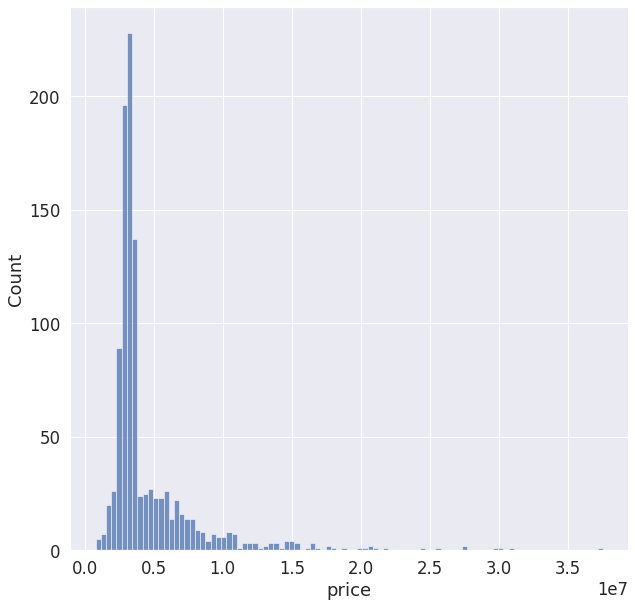

In [ ]:
plt.figure(figsize=(10,10))
sns.histplot(
              x='price',
              data=df
             )

На гистограмме видно, что наибольшее количество объектов имеет цену 3-5 млн. руб, в то время как выбросы имеют цену выше 15 млн. руб.

## Type

Text(0.5, 1.0, 'Type')

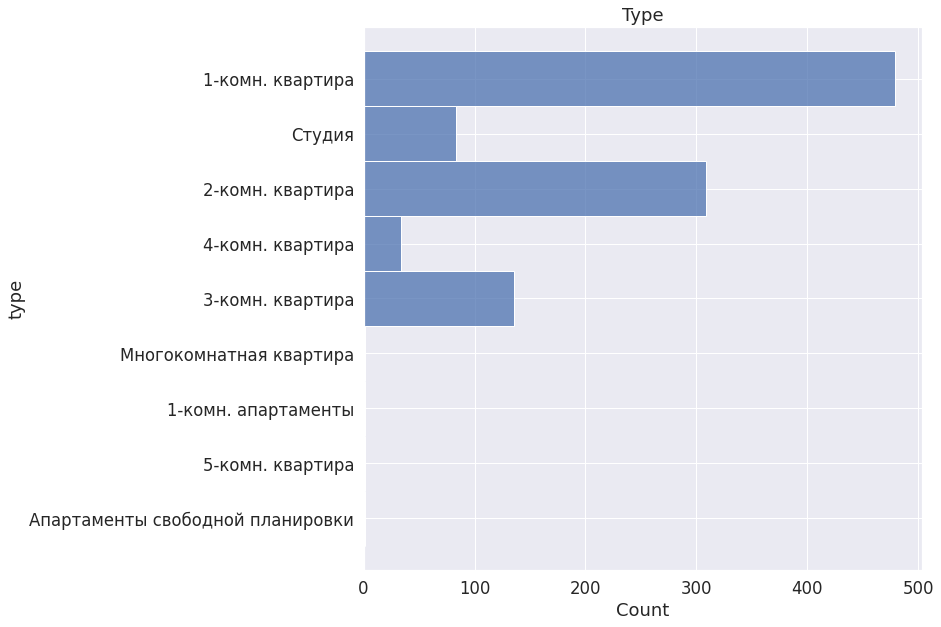

In [ ]:
plt.figure(figsize=(10,10))
sns.histplot(
              y='type', 
              data=df
             )
plt.title('Type')

В общем, большинство продаваемых квартир - это 1-комнатные квартиры

Будем считать, что `1-комн. апартаменты` и `1-комн. квартира` - это одно и то же

In [ ]:
df.type.replace(to_replace = 'Апартаменты свободной планировки',    # удалим значения чтобы уменьшить кол-во категорий
                value = np.nan,
                inplace=True)                     
df.type.replace(to_replace = 'Многокомнатная квартира', 
                value = np.nan,
                inplace=True)     
df.type.replace(to_replace = '1-комн. апартаменты', value = '1-комн. квартира', inplace=True)

## Living area

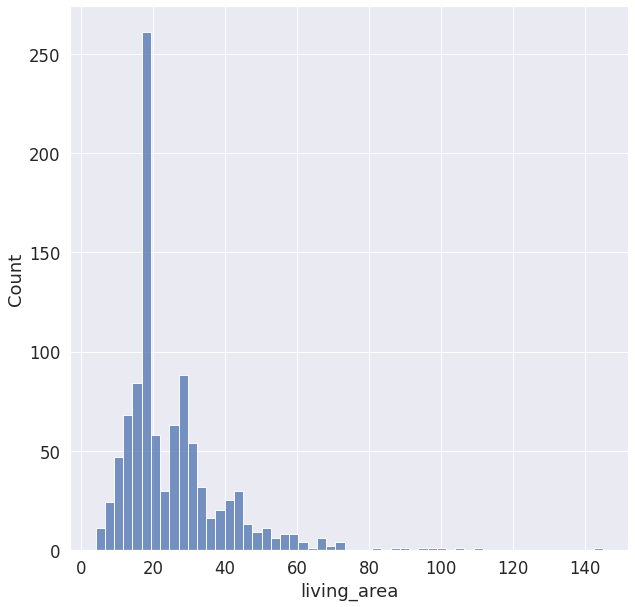

In [ ]:
plt.figure(figsize=(10,10))
sns.histplot(
            x='living_area',
            data=df
            )

Большая часть объектов имеет общую площадь кухни в промежутке от 15 до 75 квадратных метров. Квартиры с большей площадью - аномальные значения.

## Kitchen area

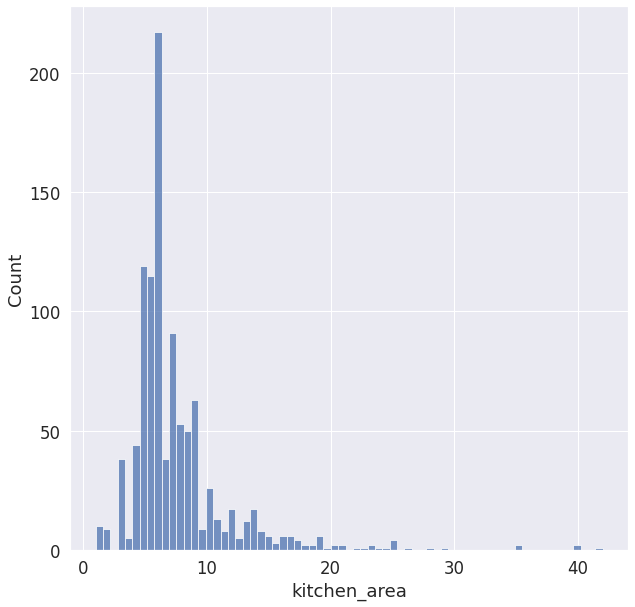

In [ ]:
plt.figure(figsize=(10,10))
sns.histplot(
              x='kitchen_area',
              data=df
             )

При сравнении графиков распределения площади кухни и общей площади квартиры можно заметить, что их распределения примерно одинаковы.

## Floor

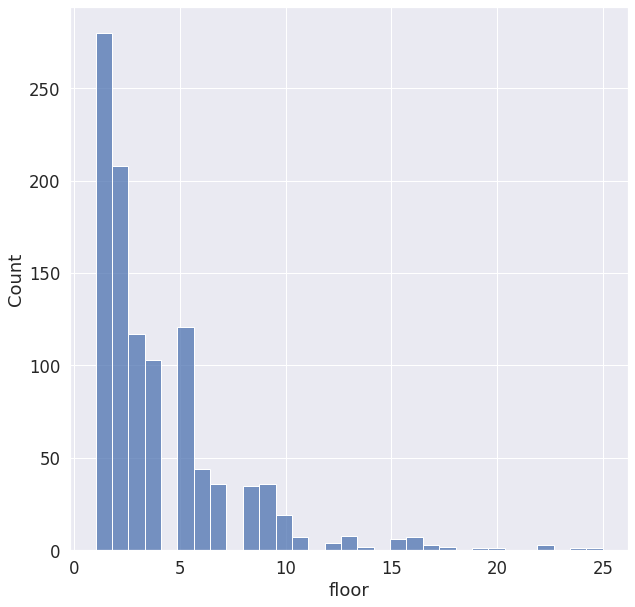

In [ ]:
plt.figure(figsize=(10,10))
sns.histplot(
              x='floor', 
              data=df
             )

Большинство продаваемых квартир расположено на первых этажах. Эту особенность можно попробовать объяснить тем, что в городе не так много многоэтажных домов с более чем 10-ю этажами.

## Year_built

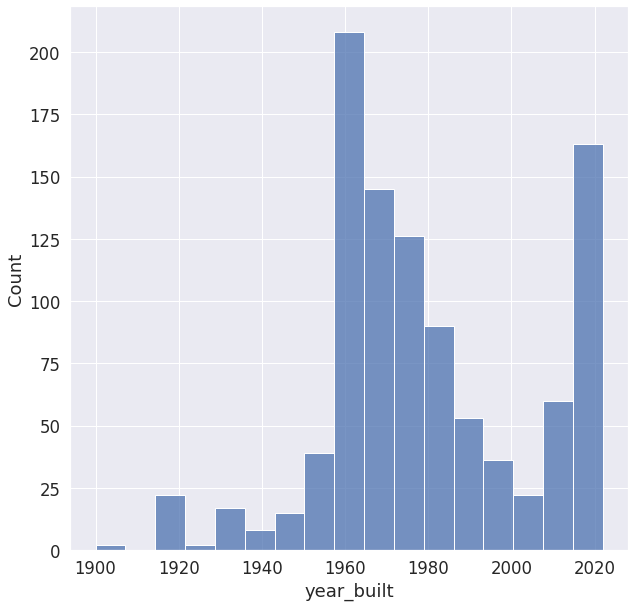

In [ ]:
plt.figure(figsize=(10,10))
sns.histplot(
              x='year_built',
              data=df
             )

На данном графике показано бимодальное распределение. Видно, что на рынке жилья продается большое количество как старых домов, так и новостроек.

## Entrance

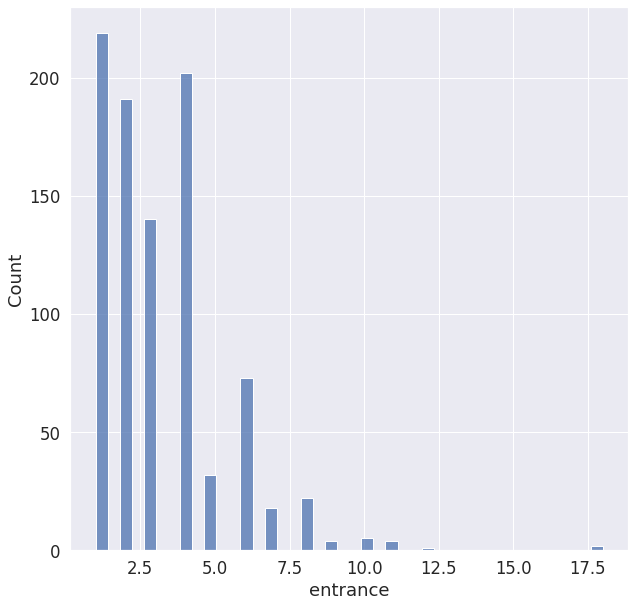

In [ ]:
plt.figure(figsize=(10,10))
sns.histplot(
              x='entrance',
              data=df
             )

Большинство квартир располагается в 1-6 подъездах. Если считать, что в данных нет ошибок, то в Нижнем есть дома с более чем 10-ю подъездами

## District

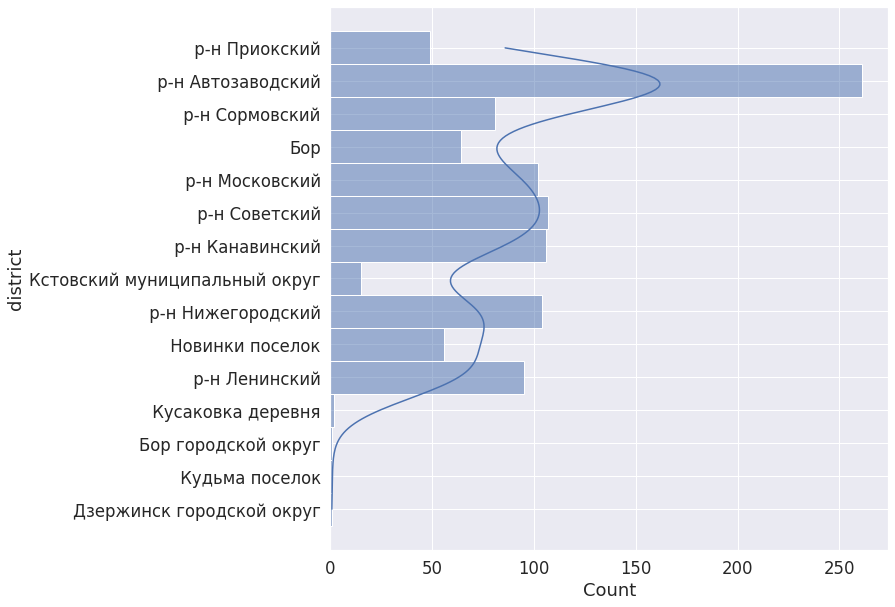

In [ ]:
plt.figure(figsize=(10,10))
sns.histplot(
              y='district',
              kde=True, 
              data=df
             )


Наибольшая доля продаваемых квартир приходится на Автозаводский район. У остальных районов доля выставленных на продажу квартир примерно одинаковая.

Признак `district` очень много категорий и некоторые из них довольно малочисленные, чтобы упростить работу с данными объединим их в одну категорию `другое`

In [ ]:
df['district'].where(
    df['district'].apply(
        lambda x: df['district'].value_counts()[x] > df['district'].value_counts().sum() * 0.05),
    'другое', 
    inplace=True)

## Bathroom

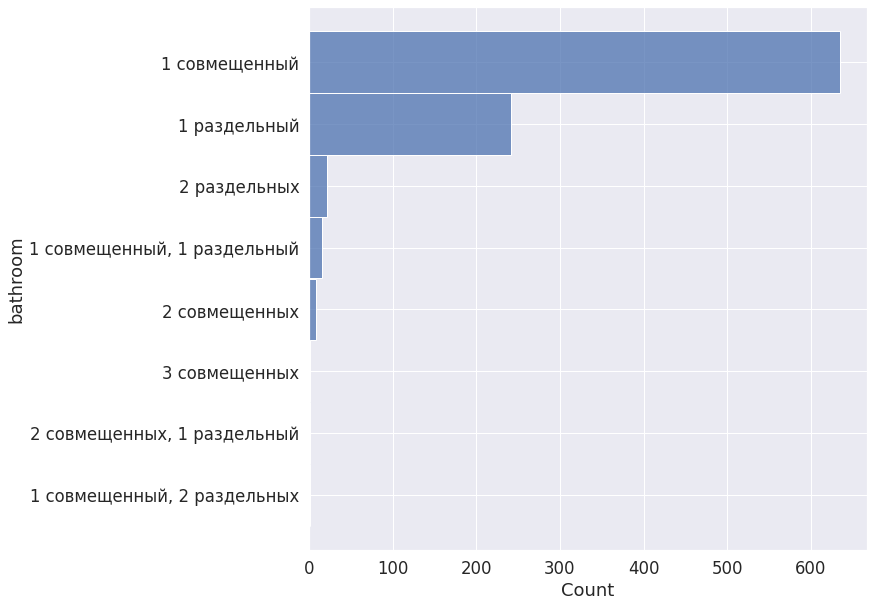

In [ ]:
plt.figure(figsize=(10,10))
sns.histplot(
              y='bathroom',
              data=df
             )


Большинство квартир имеет совмещенный санузел. Доля квартир с 1 разднльном санузлом также значительна, остальные категории малочисленны

Преобразуем данный признак в два признака - наличие санузла раздельного типа и наличие санузла смежного типа (без уточнения количества)

In [ ]:
df['separate bathroom'] = np.where(df['bathroom'].str.contains('раздел'), 'Да', 'Нет')
df['joint bathroom'] = np.where(df['bathroom'].str.contains('совмещен'),  'Да', 'Нет')
df.drop(columns=['bathroom'], inplace=True)

## Maintenance

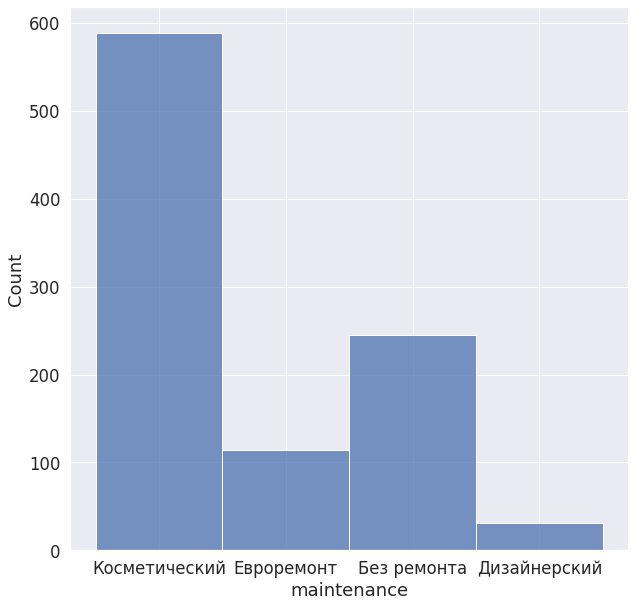

In [ ]:
plt.figure(figsize=(10,10))
sns.histplot(
              x='maintenance', 
              data=df
             )

## Emergency

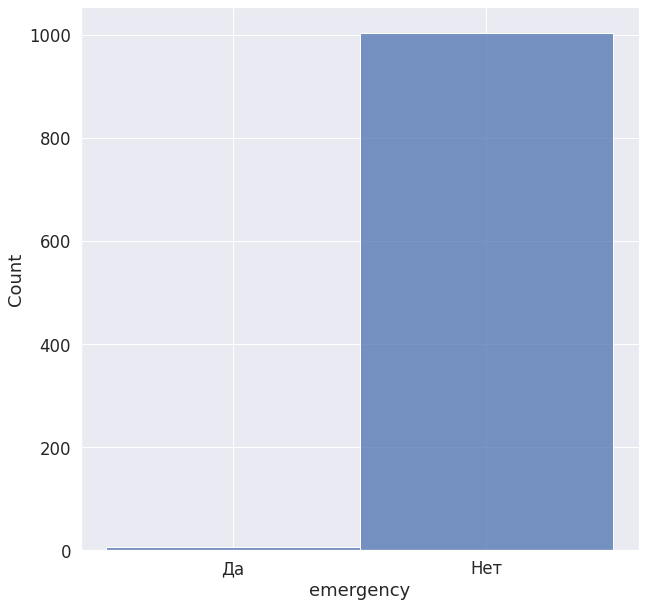

In [ ]:
plt.figure(figsize=(10,10))
sns.histplot(
              x='emergency',
              data=df
             )

Почти для всех квартир указано отсутствие аварийности. Действительно, аварийность - это не то, что может привлечь потенциальных покупателей)

## Heating

([0, 1, 2, 3, 4, 5], <a list of 6 Text major ticklabel objects>)

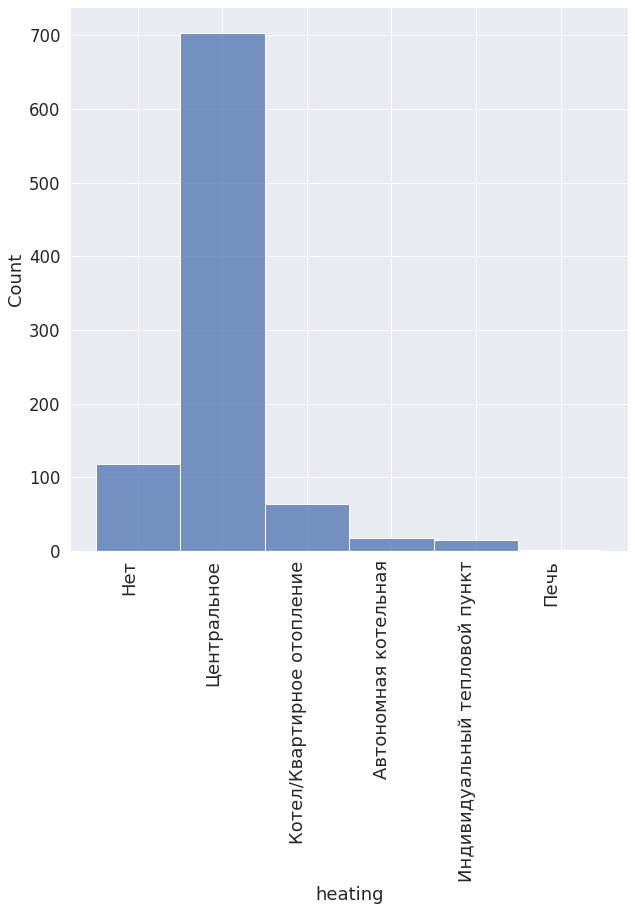

In [ ]:
plt.figure(figsize=(10,10))
sns.histplot(
              x='heating',
              data=df
             )

plt.xticks(
    rotation='vertical',
    horizontalalignment='right',
    fontweight='light',
    fontsize='medium'  
)

Из построенной диаграммы видно, что большинство квартир имеет центральное отопление. Присутствуют и выбросы - квартиры с печками, которые можно объяснить тем, что на сайте продаются квартиры не только в самом городе, но и в пригородном районе.

Наверное, более значимым признаком будет наличие или отсутствие отопления, а не его тип

In [ ]:
df['heating'] = np.where(df['heating'].str.contains('Нет'), 'Нет', 'Да')

# Визуализация

## Boxplot: *price*/ *maintenance*

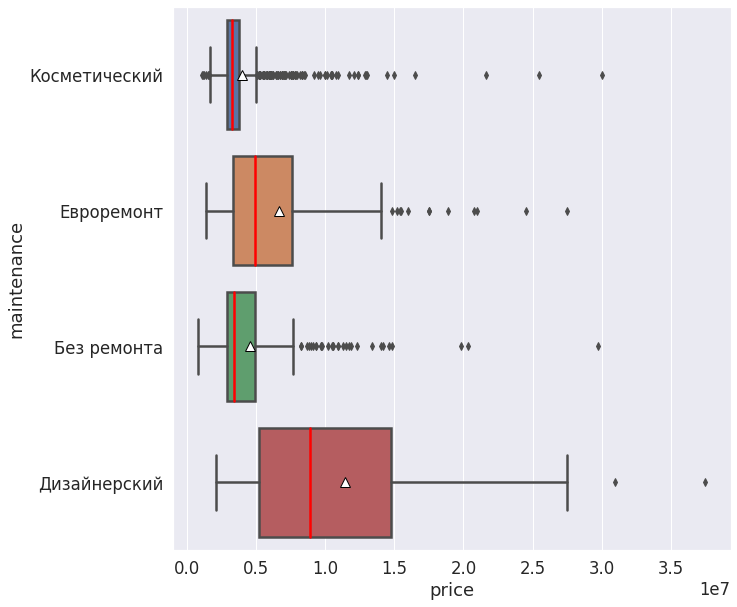

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(
            x='price',
            y='maintenance',
            data=df,
            showmeans=True,
            medianprops={'color': "red"},
            meanprops={"marker":"^",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"},
            linewidth=2.5
            )

Сравнение значений признаков:

* наименьшие значение цены у квартир без ремонта

* самый большой разброс по ценам у квартир с дизайнерским ремонтом

* большинство цен у квартир с дизайнерским ремонтом находится в пределах межквартильного диапазона, однако они имеют самый большой выброс на всей выборке

* медиана квартир с косметическим ремонтом и без ремонта находится примерно на том же уровне, что и нижний квартиль квартир с евроремонтом  


## Scatterplot: *price*/ *total_area*/ *type*

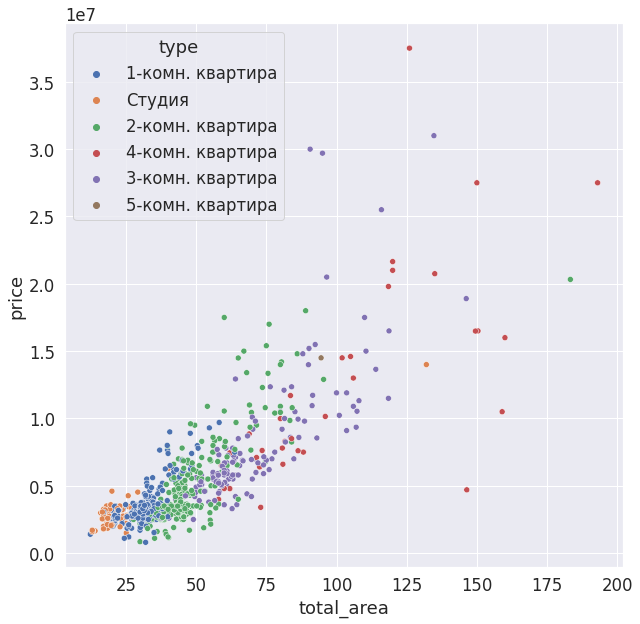

In [ ]:
plt.figure(figsize=(10,10))
ax=sns.scatterplot(
                y='price', 
                x='total_area', 
                hue='type',
                data=df
                )

На данном графике видна положительная корреляция между признаками *price* и *total_area* и *type*. Согласно данному графику, чем больше площадь квартиры, тем большую она имеет цену.

## Pointplot: *district*/ *price*

(array([ 2000000.,  4000000.,  6000000.,  8000000., 10000000., 12000000.,
        14000000.]), <a list of 7 Text major ticklabel objects>)

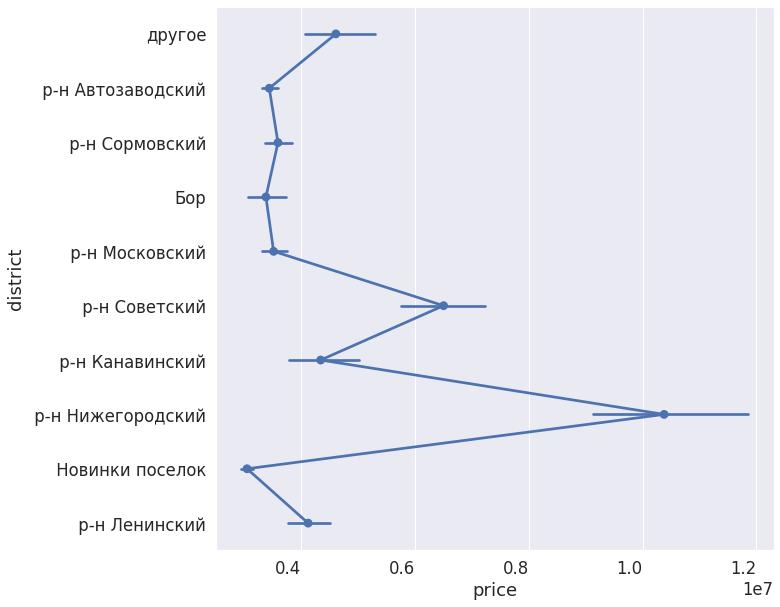

In [ ]:
plt.figure(figsize=(10,10))
sns.pointplot(data=df,
              y='district',
              x='price')

plt.xticks(
    rotation='horizontal', 
    horizontalalignment='right',
    fontweight='light'
)

Данный график показывает разницу средних значений цен за квартиру в разных районах Нижнего Новгорода. Можно заметить тенденцию: в центральных районах города среднее значение цены за квартиру выше, однако и разброс цен в таких районах также велик. В отдаленных районах ситуация прямо противоположная.

# Проверка гипотез

## Гипотеза раз:

**H0:** Математическое ожидание цены для однокомнатной квартиры и математическое ожидание для студии будут одинаковыми

**H1:** Математическое ожидание цены для однокомнатной квартиры и математическое ожидание для студии не будут одинаковыми

In [ ]:
df1 = df.groupby(['type'])['price'].agg(np.mean)
df1

type
1-комн. квартира    3.324613e+06
2-комн. квартира    4.753763e+06
3-комн. квартира    8.074606e+06
4-комн. квартира    1.238318e+07
5-комн. квартира    1.450000e+07
Студия              2.972470e+06
Name: price, dtype: float64

Разделим датафрейм на однокомнатные квартиры и студии с сохранением остальных характеристик.

In [ ]:
one_room_appartment = df[df['type'] == '1-комн. квартира']

In [ ]:
studio = df[df['type'] == 'Студия']

### Меры различий для несвязанных выборок
Т-Критерий Студента (для параметрических несвязанных)

In [ ]:
from scipy.stats import ttest_ind
stat, p = ttest_ind(one_room_appartment['price'], studio['price'])

print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
	print('Probably the same distributions (H0)')
else:
	print('Probably different distributions (reject H0)')

Statistics=2.613, p=0.009
Probably different distributions (reject H0)


Ошибка первого типа связана с тем, что мы отвергаем нулевую гипотезу, когда она на самом деле корректна.


То есть при ошибке первого типа мы утверждаем, что существует некоторый эффект, которого на самом деле нет. Эта ошибка напрямую связана со статистическим уровнем значимости α. Ведь по сути выбирая «альфу» — мы как раз выбираем вероятность, что мы совершаем ошибку первого типа (что мы находим эффект, которого на самом деле не существует из-за того, что нам попалась выборка отличная от генеральной совокупности). А значит, чем меньше уровень статистической значимости — тем меньше вероятность эту ошибку совершить.


Ошибка второго типа связана с тем, что мы не отвергаем нулевую гипотезу, хотя на самом деле некоторая разница или взаимосвязь существует.


В отличие от ошибки первого типа, у нас нет какого-то критерия, который выражает вероятность ее совершения. Ошибка второго типа может быть, например, связана с тем, что размер эффекта такой маленький, что его сложно зафиксировать на выборке небольшого размера.

Следовательно, математическое ожидание цены для однокомнатной квартиры и студии могут быть отличны

## Гипотеза двас:

**H0:** Математическое ожидание цены для квартир с евроремонтом и математическое ожидание для квартир без ремонта будут одинаковыми

**H1:** Математическое ожидание цены для квартир с евроремонтом и математическое ожидание для квартир без ремонта будут различаться


In [ ]:
df1 = df.groupby(['maintenance'])['price'].agg(np.mean)
df1

maintenance
Без ремонта      4.554085e+06
Дизайнерский     1.140219e+07
Евроремонт       6.682833e+06
Косметический    4.006925e+06
Name: price, dtype: float64

Разделим датафрейм на квартиры с Евроремонтом и на квартиры Без ремонта с сохранением остальных характеристик.

In [ ]:
no_rep = df[df['maintenance'] == 'Без ремонта']

In [ ]:
euro_rep = df[df['maintenance'] == 'Евроремонт']

### Меры различий для несвязанных выборок
Т-Критерий Студента (для параметрических несвязанных)

In [ ]:
stat, p = ttest_ind(no_rep['price'], euro_rep['price'])

print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
	print('Probably the same distributions (H0)')
else:
	print('Probably different distributions (reject H0)')

Statistics=-4.681, p=0.000
Probably different distributions (reject H0)


Следовательно, математическое ожидание цены для квартир с Евроремонтом и квартир Без ремонта могут быть отличны

# Корреляционный анализ

## Корелляция Пирсона

In [ ]:
sns.set_style('ticks')

In [ ]:
def show_heatmap(data, mask=None, title=None):
    fig, ax = plt.subplots(figsize=(12, 8))
    sns.heatmap(data, 
                cmap='coolwarm',  
                linewidths=3, 
                annot=True, 
                vmin=-1, 
                vmax=1, 
                mask=mask)
    if title:
      ax.set_title(title, fontsize=20)
    plt.show()

Найдём корреляции Пирсона в рамках Датафрейма.

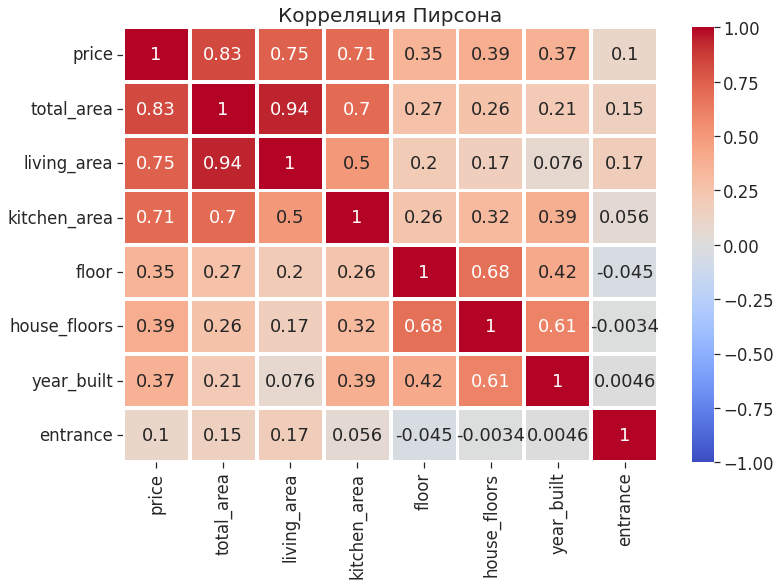

In [ ]:
correlations = df.corr()
show_heatmap(correlations, title='Корреляция Пирсона')

Для удобства более сильные положительные корреляции тяготеют к красному цвету. Более сильные отрицательные -- к синему. Чем слабее корреляция, тем бледнее её цвет. 

Чтобы сделать таблицу корреляций ещё более наглядной, удалим слабые корреляции с коэффициентом меньше |±0.5|

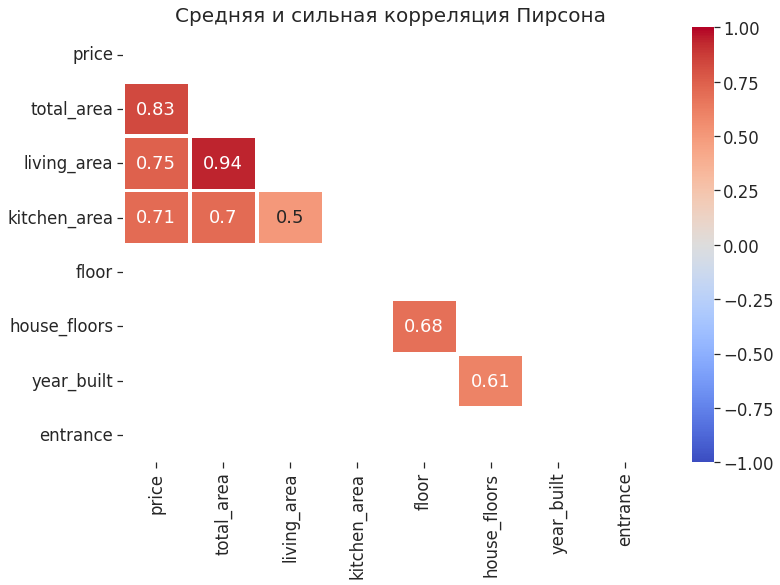

In [ ]:
upper_part = np.triu(np.ones_like(correlations))  # filter out values on and over the main diagonal
not_strong = correlations.applymap(lambda x: abs(x) < .5)  # filter out correlations with absolut value less than 0.5

show_heatmap(correlations, mask=(upper_part|not_strong), title='Средняя и сильная корреляция Пирсона')

Все установленные средние и сильные корреляции Пирсона являются положительными. 

Наибольшая прослеживается между ценой и площадью квартиры (а также жилой площадью и площадью кухни), что неудивительно, ведь площадь квартиры включает в себя жилую и нежилую (в которую включена площадь кухни).

Отдельно видим сильную корреляцию общей площади с жилой (0.94) и с кухонной (0.7). 

Также установлена средняя корреляция между площадью кухни и жилой площадью (0.5).

Корреляция (0.68) между количеством этажей и номером этажа квартиры, так как количество этажей накладывает ограничение на этаж квартиры. 

Обнаружена корреляция между годом постройки и количеством этажей (0.61). Чем позднее год постройки здания, тем оно более высокое.

## Корреляция Спирмена

In [ ]:
def create_dataframe_with_spearman_pvalues(dataframe):
    """
    Works similar to pandas.DataFrame.corr, but returns dataframe with spearman p-values
    """
    pvalues = {}
    for i in dataframe.columns:
        pvalues[i] = [spearmanr(dataframe[i], dataframe[j])[1] for j in dataframe.columns]
    return pd.DataFrame(pvalues, index=dataframe.columns)

In [ ]:
pvalues = create_dataframe_with_spearman_pvalues(df.select_dtypes(exclude=['object']))
correlations = df.corr(method='spearman')

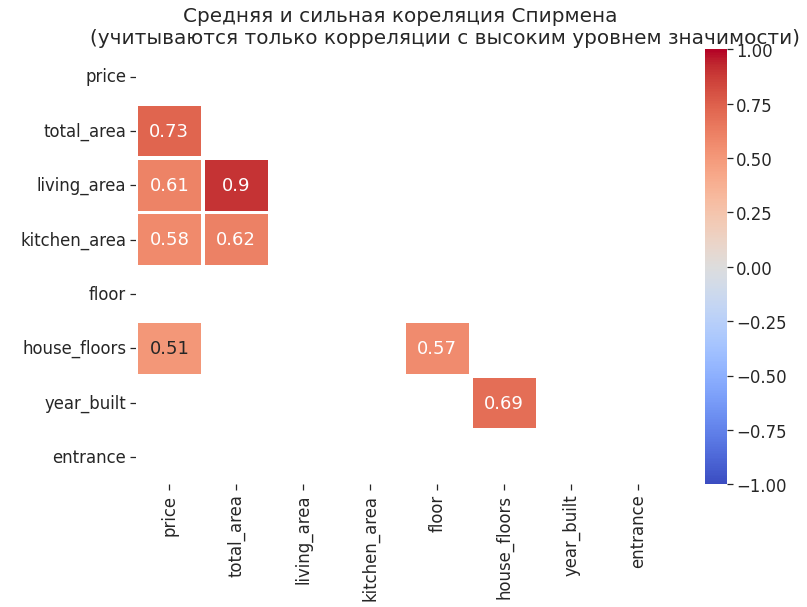

In [ ]:
upper_part = np.triu(np.ones_like(correlations))
not_strong = correlations.applymap(lambda x: abs(x) < .5) # filter out rho less than 0.5 or more than -0.5
not_significant = pvalues.applymap(lambda x: x >= .05) # filter out pvalue more than 0.05

show_heatmap(correlations, 
             mask=(upper_part|not_strong|not_significant), 
             title='''Средняя и сильная кореляция Спирмена 
             (учитываются только корреляции с высоким уровнем значимости)''')

Корреляции Спирмена наблюдается между теми же переменными, что и корреляция Пирсона, но с немного другими коэффициентами. Неудевительно, ведь коэффициент корреляции Спирмена между двумя признаками — это коэффициент корреляции Пирсона между их ранговыми значениями.

Также обнаружена дополнительная средняя корреляция между ценой квартиры и количеством этажей в доме (0.51).

# Машинное обучение

## Baseline: линейная регрессия

Создадим копию датасета

In [ ]:
data=df

Кодируем категориальные признаки с помощью one-hot encoding

In [ ]:
data = pd.get_dummies(data, columns=data.select_dtypes(include=['object']).columns)
data

,price,total_area,living_area,kitchen_area,floor,house_floors,year_built,entrance,type_1-комн. квартира,type_2-комн. квартира,...,maintenance_Евроремонт,maintenance_Косметический,emergency_Да,emergency_Нет,heating_Да,heating_Нет,separate bathroom_Да,separate bathroom_Нет,joint bathroom_Да,joint bathroom_Нет
0,2990000,30.7,20.3,4.4,2,2,1958.0,2.0,1,0,...,0,0,1,0,0,1,0,1,1,0
1,3360000,35.0,18.0,9.0,7,9,1993.0,NaN,1,0,...,0,1,0,1,0,1,0,1,1,0
2,6300000,40.2,16.8,10.5,13,17,2014.0,2.0,0,0,...,1,0,0,1,1,0,1,0,0,1
3,3400000,33.0,18.0,6.0,1,9,1977.0,18.0,1,0,...,0,0,0,1,1,0,0,1,1,0
4,2150000,32.1,17.0,6.0,2,5,1985.0,6.0,1,0,...,0,1,0,1,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1040,3550000,31.6,17.0,6.6,2,5,1972.0,NaN,1,0,...,0,0,0,1,0,1,0,1,1,0
1041,6300000,45.6,30.0,7.0,5,10,1970.0,NaN,0,1,...,0,0,0,1,0,1,0,1,1,0
1042,30000000,90.6,60.0,14.0,16,17,2008.0,1.0,0,0,...,0,1,0,1,1,0,0,1,1,0
1043,10400000,78.0,NaN,17.4,7,17,2010.0,2.0,0,1,...,0,1,0,1,0,1,1,0,0,1


Заполняем пропущенные значения медианой

In [ ]:
data.fillna(df.median(), inplace=True)

<ipython-input-79-732649f7ff20>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.fillna(df.median(), inplace=True)


Выделяем признаковое пространство и целевую переменную. Делим выборку на тренировочную и тестовую

In [ ]:
X = data.iloc[:, 1:]
y = data.price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
													random_state=42)

Обучаем модель и делаем предсказания для тестовой выборки

In [ ]:
regression_model = linear_model.LinearRegression()

regression_model.fit(X_train, y_train)
y_predicted = regression_model.predict(X_test)

Создадим словарь в котором будем хранить значения метрик для каждой модели

In [ ]:
evaluation = {}

In [ ]:
def calculate_scores(y_test, y_predicted):
  '''
  Returns the dictionary with scores obtained by 3 metrics:
  MAE, RMSE, r2
  '''
  mae = mean_absolute_error(y_test, y_predicted)
  rmse = mean_squared_error(y_test, y_predicted, squared=False)
  r2 = r2_score(y_test, y_predicted)
  scores = {'RMSE': f'{rmse:.0f}', 'MAE': f'{mae:.0f}', 'r2': f'{r2:.3f}'}
  return scores

Оценка модели

In [ ]:
scores = calculate_scores(y_test, y_predicted)
evaluation['baseline'] = scores
for metric, score in scores.items():
  print(metric, score)

RMSE 1900977
MAE 923269
r2 0.717


## Другие модели

### Создание пайплайна предобработки

Выделяем признаковое пространство и целевую переменную. Делим на тестовую и тренировочную выборку

In [ ]:
X = df.iloc[:, 1:]
y = df.price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

Выделяем числовые и категориальные признаки

In [ ]:
num_cols = X_train.select_dtypes(exclude=['object']).columns.tolist()
cat_cols = X_train.select_dtypes(include=['object']).columns.tolist()

Создаем пайплайн для обработки числовых признаков

In [ ]:
from sklearn.preprocessing import RobustScaler

num_pipe = make_pipeline(
    RobustScaler(), # стандартизиция значений
    KNNImputer(), # заполнение пропущенных значений на основе похожих объектов
)

Создаем пайплайн для категориальных признаков

In [ ]:
cat_pipe = make_pipeline(
    OneHotEncoder(handle_unknown='ignore', sparse=False)
)

Объединяем в один пайплайн

In [ ]:
from sklearn.feature_selection import SelectKBest

full_pipe = ColumnTransformer([
    ('num', num_pipe, num_cols),
    ('cat', cat_pipe, cat_cols),
])

#### Линейная регрессия (подбор гиперпараметров)

создаем пайплан с линейной регрессией

In [ ]:
linreg = make_pipeline(full_pipe, LinearRegression())

Добавляем сетку поиска гиперпараметров

In [ ]:
parameters = dict(
    columntransformer__num__knnimputer__n_neighbors = range(1, 5),
    linearregression__fit_intercept=[True, False],
    linearregression__positive = [True, False]
)   

linreg_grid = GridSearchCV(linreg, parameters, n_jobs=-1, cv=5, refit=True)

Визуализация получившегося пайплайна

In [ ]:
set_config(display='diagram')
linreg_grid

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('robustscaler',
                                                                                          RobustScaler()),
                                                                                         ('knnimputer',
                                                                                          KNNImputer())]),
                                                                         ['total_area',
                                                                          'living_area',
                                                                          'kitchen_area',
                                                                          'floor',
                                                                          'house_floors',
                                                                          'year_built',
                                                                          'entrance']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse=False))]),
                                                                         ['type',
                                                                          'district',
                                                                          'maintenance',
                                                                          'emergency',
                                                                          'heating',
                                                                          'separate '
                                                                          'bathroom',
                                                                          'joint '
                                                                          'bathroom'])])),
                                       ('linearregression',
                                        LinearRegression())]),
             n_jobs=-1,
             param_grid={'columntransformer__num__knnimputer__n_neighbors': range(1, 5),
                         'linearregression__fit_intercept': [True, False],
                         'linearregression__positive': [True, False]})

Обучение модели, получение оптимальных гиперпараметров

In [ ]:
linreg_grid.fit(X_train, y_train)
linreg_grid.best_params_

{'columntransformer__num__knnimputer__n_neighbors': 4,
 'linearregression__fit_intercept': False,
 'linearregression__positive': True}

Делаем предсказание на тестовых данных и оцениваем модель

In [ ]:
y_predicted = linreg_grid.predict(X_test)
scores = calculate_scores(y_test, y_predicted)
evaluation['Linreg (grid search)'] = scores
for metric, score in scores.items():
  print(metric, score)

RMSE 1888190
MAE 902805
r2 0.721


#### Случайный лес

Добавляем к готовому пайплайну предобработки модель случайного леса

In [ ]:
random_forest = make_pipeline(
    full_pipe, RandomForestRegressor(random_state=42))

random_forest.fit(X_train, y_train)

y_predicted = random_forest.predict(X_test)

In [ ]:
scores = calculate_scores(y_test, y_predicted)
evaluation['Random forest'] = scores
for metric, score in scores.items():
  print(metric, score)

RMSE 1906146
MAE 784060
r2 0.715


#### Бустинг

In [ ]:
boosting = make_pipeline(
    full_pipe, XGBRegressor(random_state=42))

boosting.fit(X_train, y_train)

y_predicted = boosting.predict(X_test)



[01:09:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
scores = calculate_scores(y_test, y_predicted)
evaluation['XGB regression'] = scores
for metric, score in scores.items():
  print(metric, score)

RMSE 1853387
MAE 750875
r2 0.731


## Cравнение моделей

In [ ]:
pd.DataFrame(evaluation)

,baseline,Linreg (grid search),Random forest,XGB regression
RMSE,1900977,1888190,1906146,1853387
MAE,923269,902805,784060,750875
r2,0.717,0.721,0.715,0.731


В итоге `Linreg (grid search)` удалось превзойти baseline (линейную регрессию без дополнительной предобработки и подбора гиперпараметров) по всем метрикам, `Random forest` показывает значительно лучший результат по сравнению с baseline'ом для метрики MAE, но проигрывает в остальных метриках, `XGB regression` по всем метрикам превосходит другие модели